# Single Layer Neural Network (perceptron)
* Activation Function = Sigmoid
* Loss Function = MSE

In [1]:
import numpy as np

from matplotlib import pyplot as plt

## Our Activation Function, the Sigmoid

In [2]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

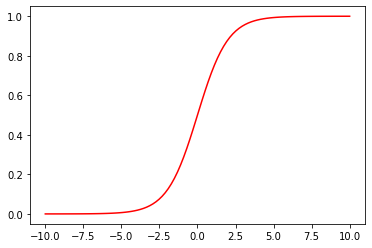

In [3]:
input = np.linspace(-10, 10, 100)

plt.plot(input, sigmoid(input), c="r")

## Derivative of Activation Function

In [14]:
def sigmoid_derivative(x):
    return sigmoid(x) * (1-sigmoid(x))

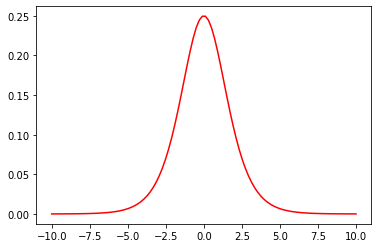

In [15]:
input = np.linspace(-10, 10, 100)

plt.plot(input, sigmoid_derivative(input), c="r")

## Define input and expected output (labels)

In [173]:
# independent variables

feature_set = np.array([[0,1,0],
                    [0,0,1],
                    [1,0,0],
                    [1,1,0],
                    [1,1,1],
                    [0,1,1],
                    [0,1,0]])

feature_set.shape

(7, 3)

In [174]:
# dependent variables

labels = np.array([ [1, 
                    0,
                    0,
                    1,
                    1,
                    0,
                    1]])

# convert labels to vector
labels = labels.reshape(7,1)

labels.shape

(7, 1)

## Initialize hyperparameters

In [198]:
np.random.seed(42)

In [199]:
# define weights

weights = np.random.rand(3,1)

weights.shape

(3, 1)

In [200]:
# bias

bias = np.random.rand(1)

bias.shape

(1,)

In [201]:
# learning rate
lr = 0.05

## step through gradient descent loop once

### forward pass

In [138]:
weights

array([[0.36267782],
       [0.94369419],
       [0.69785745]])

In [139]:
bias

array([0.55880143])

In [140]:
XW = np.dot(feature_set, weights) + bias

XW

array([[1.50249563],
       [1.25665889],
       [0.92147925],
       [1.86517344],
       [2.5630309 ],
       [2.20035308],
       [1.50249563]])

In [141]:
z = sigmoid(XW)

z

array([[0.8179464 ],
       [0.77845042],
       [0.71534342],
       [0.86589882],
       [0.92844408],
       [0.90028121],
       [0.8179464 ]])

In [142]:
labels

array([[1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1]])

In [143]:
error = z - labels

(error, error.sum())

(array([[-0.1820536 ],
        [ 0.77845042],
        [ 0.71534342],
        [-0.13410118],
        [-0.07155592],
        [ 0.90028121],
        [-0.1820536 ]]),
 1.8243107340899896)

### back-propagation

### Calculate Slope of Cost Function

* For single layer net, using chain rule, d_cost/d_weight = d_cost/d_pred * d_pred/d_z * d_z/d_w
* for MSE, d_cost/d_pred = 2(predicted - observed), which is just the error 
* for Sigmoid, d_pred/d_z is Sigmoid*(1-Sigmoid)
* for single layer, z = x1w1+x2w2+x3w3+b, so d_z/d_w = x (input)



In [144]:
d_cost_d_pred = error

d_cost_d_pred.shape

(7, 1)

In [145]:
d_pred_d_z = sigmoid_derivative(z)

d_pred_d_z.shape

(7, 1)

In [146]:
d_cost_d_z = d_cost_d_pred * d_pred_d_z

d_cost_d_z.shape

(7, 1)

In [147]:
d_z_d_w = feature_set.T

d_z_d_w.shape

(3, 7)

In [148]:
d_cost_d_weight = np.dot(d_z_d_w, d_cost_d_z)

d_cost_d_weight

array([[0.11529875],
       [0.06515723],
       [0.33832954]])

In [149]:
lr * d_cost_d_weight

array([[0.00576494],
       [0.00325786],
       [0.01691648]])

In [150]:
new_weights = weights - lr * d_cost_d_weight

(weights, new_weights)

(array([[0.36267782],
        [0.94369419],
        [0.69785745]]),
 array([[0.35691288],
        [0.94043633],
        [0.68094098]]))

In [151]:
weights = new_weights

In [152]:
d_cost_d_z

array([[-0.03867573],
       [ 0.16787037],
       [ 0.15777617],
       [-0.02795047],
       [-0.01452695],
       [ 0.18498611],
       [-0.03867573]])

In [153]:
new_bias = bias

for num in d_cost_d_z:
    new_bias = new_bias - lr*num
    
(bias,new_bias)

(array([0.55880143]), array([0.53926125]))

In [154]:
bias = new_bias

## Training Loop

### Initialize hyperparameters

In [252]:
np.random.seed(42)

In [253]:
# define weights

weights = np.random.rand(3,1)

weights

array([[0.37454012],
       [0.95071431],
       [0.73199394]])

In [254]:
# bias

bias = np.random.rand(1)

bias

array([0.59865848])

In [255]:
# learning rate
lr = 0.05

In [256]:

for epoch in range(25000):
    # forward pass
    
    inputs = feature_set
    XW = np.dot(inputs, weights) + bias
    
    z = sigmoid(XW)
    error = z - labels
    print( "Epoch ", epoch, " Error: ", error.sum() )
    
    # backward pass
    
    # find slope of cost function using chain rule
    d_cost_d_pred = error
    d_pred_d_z = sigmoid_derivative(z)
    d_z_d_w = feature_set.T
 
    # do actual calc of cost function slope
    d_cost_d_z = d_cost_d_pred * d_pred_d_z
    d_cost_d_weight = np.dot(d_z_d_w, d_cost_d_z)
    
    # adjust weights via learning rate (lr)
    # NB: always SUBTRACT the adjustment since we want to DECREASE Cost Function
    weights = weights - lr * d_cost_d_weight
    
    for num in d_cost_d_z:
        bias = bias - lr*num


Epoch  0  Error:  1.8806216715619812
Epoch  1  Error:  1.8525640899325237
Epoch  2  Error:  1.8243107340899896
Epoch  3  Error:  1.7958847686438375
Epoch  4  Error:  1.7673099081827413
Epoch  5  Error:  1.7386103353186555
Epoch  6  Error:  1.70981061515949
Epoch  7  Error:  1.6809356068569574
Epoch  8  Error:  1.6520103729182125
Epoch  9  Error:  1.623060087002853
Epoch  10  Error:  1.5941099409498616
Epoch  11  Error:  1.5651850517915373
Epoch  12  Error:  1.5363103695131097
Epoch  13  Error:  1.5075105863073248
Epoch  14  Error:  1.4788100480531448
Epoch  15  Error:  1.4502326687170073
Epoch  16  Error:  1.4218018483346397
Epoch  17  Error:  1.3935403951819836
Epoch  18  Error:  1.3654704526863837
Epoch  19  Error:  1.3376134315651074
Epoch  20  Error:  1.3099899476087358
Epoch  21  Error:  1.282619765453504
Epoch  22  Error:  1.2555217486106485
Epoch  23  Error:  1.2287138159438014
Epoch  24  Error:  1.202212904708781
Epoch  25  Error:  1.1760349401952295
Epoch  26  Error:  1.150194

Epoch  378  Error:  0.09391391986533815
Epoch  379  Error:  0.09383155904610457
Epoch  380  Error:  0.0937494281448285
Epoch  381  Error:  0.09366752455355232
Epoch  382  Error:  0.09358584570316741
Epoch  383  Error:  0.09350438906272546
Epoch  384  Error:  0.09342315213877017
Epoch  385  Error:  0.09334213247467665
Epoch  386  Error:  0.09326132765000916
Epoch  387  Error:  0.09318073527988868
Epoch  388  Error:  0.09310035301437836
Epoch  389  Error:  0.09302017853787842
Epoch  390  Error:  0.09294020956853521
Epoch  391  Error:  0.09286044385766073
Epoch  392  Error:  0.09278087918916689
Epoch  393  Error:  0.09270151337900834
Epoch  394  Error:  0.0926223442746405
Epoch  395  Error:  0.09254336975448718
Epoch  396  Error:  0.09246458772741345
Epoch  397  Error:  0.0923859961322202
Epoch  398  Error:  0.09230759293714064
Epoch  399  Error:  0.09222937613934723
Epoch  400  Error:  0.09215134376447437
Epoch  401  Error:  0.09207349386614383
Epoch  402  Error:  0.09199582452550409
Epo

Epoch  773  Error:  0.06890996434090291
Epoch  774  Error:  0.06885637347238183
Epoch  775  Error:  0.06880281744867889
Epoch  776  Error:  0.06874929625028403
Epoch  777  Error:  0.06869580985789797
Epoch  778  Error:  0.06864235825242487
Epoch  779  Error:  0.06858894141497404
Epoch  780  Error:  0.06853555932685335
Epoch  781  Error:  0.06848221196956811
Epoch  782  Error:  0.06842889932481844
Epoch  783  Error:  0.06837562137449626
Epoch  784  Error:  0.06832237810068012
Epoch  785  Error:  0.06826916948563719
Epoch  786  Error:  0.06821599551181656
Epoch  787  Error:  0.06816285616184758
Epoch  788  Error:  0.06810975141853931
Epoch  789  Error:  0.06805668126487383
Epoch  790  Error:  0.06800364568400807
Epoch  791  Error:  0.0679506446592677
Epoch  792  Error:  0.0678976781741468
Epoch  793  Error:  0.0678447462123036
Epoch  794  Error:  0.06779184875756125
Epoch  795  Error:  0.06773898579390025
Epoch  796  Error:  0.06768615730546224
Epoch  797  Error:  0.06763336327654021
Epo

Epoch  1144  Error:  0.05132052734460074
Epoch  1145  Error:  0.05127909989573978
Epoch  1146  Error:  0.051237703220471914
Epoch  1147  Error:  0.051196337305275924
Epoch  1148  Error:  0.05115500213660201
Epoch  1149  Error:  0.051113697700879035
Epoch  1150  Error:  0.05107242398450884
Epoch  1151  Error:  0.05103118097386905
Epoch  1152  Error:  0.0509899686553133
Epoch  1153  Error:  0.05094878701516997
Epoch  1154  Error:  0.05090763603974191
Epoch  1155  Error:  0.05086651571530931
Epoch  1156  Error:  0.05082542602812612
Epoch  1157  Error:  0.05078436696442401
Epoch  1158  Error:  0.05074333851040852
Epoch  1159  Error:  0.050702340652261424
Epoch  1160  Error:  0.05066137337614057
Epoch  1161  Error:  0.05062043666818111
Epoch  1162  Error:  0.050579530514490934
Epoch  1163  Error:  0.050538654901156776
Epoch  1164  Error:  0.05049780981424001
Epoch  1165  Error:  0.05045699523977845
Epoch  1166  Error:  0.05041621116378703
Epoch  1167  Error:  0.05037545757225631
Epoch  1168

Epoch  1517  Error:  0.03787177859524618
Epoch  1518  Error:  0.03784073867812615
Epoch  1519  Error:  0.03780972341958466
Epoch  1520  Error:  0.03777873280201857
Epoch  1521  Error:  0.03774776680782643
Epoch  1522  Error:  0.03771682541940852
Epoch  1523  Error:  0.03768590861916632
Epoch  1524  Error:  0.03765501638950133
Epoch  1525  Error:  0.03762414871281655
Epoch  1526  Error:  0.0375933055715173
Epoch  1527  Error:  0.03756248694801012
Epoch  1528  Error:  0.037531692824700646
Epoch  1529  Error:  0.03750092318399828
Epoch  1530  Error:  0.03747017800831365
Epoch  1531  Error:  0.03743945728005604
Epoch  1532  Error:  0.03740876098164053
Epoch  1533  Error:  0.03737808909548013
Epoch  1534  Error:  0.03734744160399128
Epoch  1535  Error:  0.037316818489592285
Epoch  1536  Error:  0.037286219734701365
Epoch  1537  Error:  0.03725564532174061
Epoch  1538  Error:  0.03722509523313211
Epoch  1539  Error:  0.03719456945129984
Epoch  1540  Error:  0.03716406795867244
Epoch  1541  E

Epoch  1842  Error:  0.028983854984367147
Epoch  1843  Error:  0.028959924494108114
Epoch  1844  Error:  0.02893601318741293
Epoch  1845  Error:  0.028912121048628864
Epoch  1846  Error:  0.02888824806211243
Epoch  1847  Error:  0.02886439421222667
Epoch  1848  Error:  0.028840559483346434
Epoch  1849  Error:  0.028816743859854305
Epoch  1850  Error:  0.028792947326143792
Epoch  1851  Error:  0.028769169866613792
Epoch  1852  Error:  0.028745411465677773
Epoch  1853  Error:  0.02872167210775428
Epoch  1854  Error:  0.02869795177727119
Epoch  1855  Error:  0.028674250458667283
Epoch  1856  Error:  0.02865056813639072
Epoch  1857  Error:  0.028626904794896768
Epoch  1858  Error:  0.028603260418652465
Epoch  1859  Error:  0.028579634992131453
Epoch  1860  Error:  0.028556028499818448
Epoch  1861  Error:  0.028532440926206493
Epoch  1862  Error:  0.028508872255799234
Epoch  1863  Error:  0.02848532247310842
Epoch  1864  Error:  0.028461791562655048
Epoch  1865  Error:  0.02843827950897071


Epoch  2161  Error:  0.022243184054029363
Epoch  2162  Error:  0.02222463068112218
Epoch  2163  Error:  0.02220609199050727
Epoch  2164  Error:  0.022187567969664368
Epoch  2165  Error:  0.022169058606081038
Epoch  2166  Error:  0.022150563887257113
Epoch  2167  Error:  0.022132083800701863
Epoch  2168  Error:  0.022113618333933577
Epoch  2169  Error:  0.022095167474480648
Epoch  2170  Error:  0.022076731209881795
Epoch  2171  Error:  0.022058309527685005
Epoch  2172  Error:  0.022039902415448787
Epoch  2173  Error:  0.022021509860740585
Epoch  2174  Error:  0.022003131851138058
Epoch  2175  Error:  0.021984768374230024
Epoch  2176  Error:  0.02196641941761243
Epoch  2177  Error:  0.02194808496889472
Epoch  2178  Error:  0.02192976501569338
Epoch  2179  Error:  0.021911459545634893
Epoch  2180  Error:  0.02189316854635598
Epoch  2181  Error:  0.02187489200550441
Epoch  2182  Error:  0.021856629910736558
Epoch  2183  Error:  0.02183838224971782
Epoch  2184  Error:  0.02182014901012483
E

Epoch  2486  Error:  0.016919789199959734
Epoch  2487  Error:  0.016905402678284165
Epoch  2488  Error:  0.016891027267852993
Epoch  2489  Error:  0.016876662959136757
Epoch  2490  Error:  0.016862309742613713
Epoch  2491  Error:  0.016847967608772052
Epoch  2492  Error:  0.016833636548108183
Epoch  2493  Error:  0.016819316551124397
Epoch  2494  Error:  0.016805007608334865
Epoch  2495  Error:  0.01679070971025895
Epoch  2496  Error:  0.01677642284742692
Epoch  2497  Error:  0.016762147010374567
Epoch  2498  Error:  0.016747882189649482
Epoch  2499  Error:  0.016733628375804804
Epoch  2500  Error:  0.016719385559402
Epoch  2501  Error:  0.01670515373101289
Epoch  2502  Error:  0.016690932881215537
Epoch  2503  Error:  0.01667672300059775
Epoch  2504  Error:  0.016662524079754076
Epoch  2505  Error:  0.01664833610928909
Epoch  2506  Error:  0.01663415907981447
Epoch  2507  Error:  0.016619992981950826
Epoch  2508  Error:  0.01660583780632599
Epoch  2509  Error:  0.01659169354357759
Epo

Epoch  2843  Error:  0.01242350840961054
Epoch  2844  Error:  0.012412542026375789
Epoch  2845  Error:  0.012401583839699193
Epoch  2846  Error:  0.012390633842664311
Epoch  2847  Error:  0.012379692028362005
Epoch  2848  Error:  0.01236875838989085
Epoch  2849  Error:  0.012357832920351641
Epoch  2850  Error:  0.012346915612854448
Epoch  2851  Error:  0.012336006460515303
Epoch  2852  Error:  0.012325105456455654
Epoch  2853  Error:  0.012314212593804663
Epoch  2854  Error:  0.012303327865696212
Epoch  2855  Error:  0.012292451265271592
Epoch  2856  Error:  0.012281582785676703
Epoch  2857  Error:  0.012270722420064634
Epoch  2858  Error:  0.012259870161596909
Epoch  2859  Error:  0.01224902600343511
Epoch  2860  Error:  0.012238189938754862
Epoch  2861  Error:  0.012227361960732958
Epoch  2862  Error:  0.01221654206255507
Epoch  2863  Error:  0.012205730237410395
Epoch  2864  Error:  0.012194926478495322
Epoch  2865  Error:  0.012184130779012259
Epoch  2866  Error:  0.012173343132173

Epoch  3193  Error:  0.009040526068907873
Epoch  3194  Error:  0.009032047458953113
Epoch  3195  Error:  0.009023574972562481
Epoch  3196  Error:  0.00901510860471419
Epoch  3197  Error:  0.0090066483503847
Epoch  3198  Error:  0.008998194204559551
Epoch  3199  Error:  0.008989746162227585
Epoch  3200  Error:  0.008981304218380892
Epoch  3201  Error:  0.008972868368018111
Epoch  3202  Error:  0.008964438606141933
Epoch  3203  Error:  0.008956014927759187
Epoch  3204  Error:  0.00894759732788225
Epoch  3205  Error:  0.008939185801525168
Epoch  3206  Error:  0.008930780343709366
Epoch  3207  Error:  0.008922380949461045
Epoch  3208  Error:  0.008913987613808044
Epoch  3209  Error:  0.008905600331785085
Epoch  3210  Error:  0.00889721909843122
Epoch  3211  Error:  0.0088888439087898
Epoch  3212  Error:  0.008880474757908097
Epoch  3213  Error:  0.008872111640837427
Epoch  3214  Error:  0.008863754552635411
Epoch  3215  Error:  0.008855403488363611
Epoch  3216  Error:  0.008847058443086586

Epoch  3541  Error:  0.006427284388128313
Epoch  3542  Error:  0.006420662794992038
Epoch  3543  Error:  0.006414045825049536
Epoch  3544  Error:  0.00640743347463113
Epoch  3545  Error:  0.006400825740071725
Epoch  3546  Error:  0.006394222617708528
Epoch  3547  Error:  0.006387624103883771
Epoch  3548  Error:  0.006381030194939463
Epoch  3549  Error:  0.006374440887225052
Epoch  3550  Error:  0.006367856177091541
Epoch  3551  Error:  0.006361276060890486
Epoch  3552  Error:  0.006354700534982022
Epoch  3553  Error:  0.006348129595727059
Epoch  3554  Error:  0.006341563239486092
Epoch  3555  Error:  0.00633500146262897
Epoch  3556  Error:  0.006328444261525568
Epoch  3557  Error:  0.006321891632549509
Epoch  3558  Error:  0.006315343572076498
Epoch  3559  Error:  0.006308800076489041
Epoch  3560  Error:  0.00630226114216878
Epoch  3561  Error:  0.0062957267655015525
Epoch  3562  Error:  0.006289196942878356
Epoch  3563  Error:  0.006282671670691603
Epoch  3564  Error:  0.0062761509453

Epoch  3872  Error:  0.004467574522450293
Epoch  3873  Error:  0.004462301038308164
Epoch  3874  Error:  0.004457031124771818
Epoch  3875  Error:  0.004451764779105166
Epoch  3876  Error:  0.004446501998571134
Epoch  3877  Error:  0.004441242780437282
Epoch  3878  Error:  0.0044359871219734615
Epoch  3879  Error:  0.00443073502045227
Epoch  3880  Error:  0.004425486473145959
Epoch  3881  Error:  0.004420241477333164
Epoch  3882  Error:  0.004415000030291397
Epoch  3883  Error:  0.004409762129302511
Epoch  3884  Error:  0.004404527771649874
Epoch  3885  Error:  0.004399296954620213
Epoch  3886  Error:  0.004394069675503001
Epoch  3887  Error:  0.004388845931587837
Epoch  3888  Error:  0.004383625720167636
Epoch  3889  Error:  0.004378409038538866
Epoch  3890  Error:  0.004373195883998968
Epoch  3891  Error:  0.0043679862538474196
Epoch  3892  Error:  0.004362780145388073
Epoch  3893  Error:  0.004357577555926487
Epoch  3894  Error:  0.004352378482768676
Epoch  3895  Error:  0.0043471829

Epoch  4178  Error:  0.0030083736263129823
Epoch  4179  Error:  0.003004075518370286
Epoch  4180  Error:  0.00299978024473882
Epoch  4181  Error:  0.0029954878033157106
Epoch  4182  Error:  0.002991198192000069
Epoch  4183  Error:  0.0029869114086910897
Epoch  4184  Error:  0.0029826274512912004
Epoch  4185  Error:  0.002978346317703079
Epoch  4186  Error:  0.0029740680058341906
Epoch  4187  Error:  0.0029697925135905023
Epoch  4188  Error:  0.002965519838881797
Epoch  4189  Error:  0.0029612499796183855
Epoch  4190  Error:  0.0029569829337144915
Epoch  4191  Error:  0.0029527186990827153
Epoch  4192  Error:  0.0029484572736395848
Epoch  4193  Error:  0.0029441986553027932
Epoch  4194  Error:  0.0029399428419931983
Epoch  4195  Error:  0.0029356898316308666
Epoch  4196  Error:  0.0029314396221405414
Epoch  4197  Error:  0.002927192211445606
Epoch  4198  Error:  0.0029229475974740793
Epoch  4199  Error:  0.002918705778153785
Epoch  4200  Error:  0.002914466751415795
Epoch  4201  Error: 

Epoch  4491  Error:  0.0017914744004872696
Epoch  4492  Error:  0.0017879691459734282
Epoch  4493  Error:  0.0017844661467065898
Epoch  4494  Error:  0.0017809654010700338
Epoch  4495  Error:  0.0017774669074449856
Epoch  4496  Error:  0.0017739706642168895
Epoch  4497  Error:  0.0017704766697699548
Epoch  4498  Error:  0.0017669849224909995
Epoch  4499  Error:  0.0017634954207673414
Epoch  4500  Error:  0.0017600081629896708
Epoch  4501  Error:  0.001756523147547387
Epoch  4502  Error:  0.0017530403728317767
Epoch  4503  Error:  0.0017495598372374993
Epoch  4504  Error:  0.0017460815391594359
Epoch  4505  Error:  0.0017426054769921762
Epoch  4506  Error:  0.00173913164913303
Epoch  4507  Error:  0.001735660053981028
Epoch  4508  Error:  0.001732190689935284
Epoch  4509  Error:  0.001728723555397771
Epoch  4510  Error:  0.0017252586487704752
Epoch  4511  Error:  0.001721795968456813
Epoch  4512  Error:  0.0017183355128617683
Epoch  4513  Error:  0.0017148772803926016
Epoch  4514  Error

Epoch  4815  Error:  0.0007652558393760889
Epoch  4816  Error:  0.0007624035493289938
Epoch  4817  Error:  0.0007595530534243999
Epoch  4818  Error:  0.0007567043504179
Epoch  4819  Error:  0.0007538574390658359
Epoch  4820  Error:  0.000751012318123051
Epoch  4821  Error:  0.0007481689863508417
Epoch  4822  Error:  0.0007453274425069656
Epoch  4823  Error:  0.0007424876853510398
Epoch  4824  Error:  0.0007396497136454849
Epoch  4825  Error:  0.0007368135261519304
Epoch  4826  Error:  0.0007339791216324221
Epoch  4827  Error:  0.000731146498852836
Epoch  4828  Error:  0.0007283156565775217
Epoch  4829  Error:  0.0007254865935724386
Epoch  4830  Error:  0.0007226593086040178
Epoch  4831  Error:  0.0007198338004401894
Epoch  4832  Error:  0.0007170100678504099
Epoch  4833  Error:  0.0007141881096057873
Epoch  4834  Error:  0.0007113679244755283
Epoch  4835  Error:  0.0007085495112316986
Epoch  4836  Error:  0.000705732868648376
Epoch  4837  Error:  0.000702917995498778
Epoch  4838  Error

Epoch  5131  Error:  -5.2875017975392846e-05
Epoch  5132  Error:  -5.521748686954098e-05
Epoch  5133  Error:  -5.755850990707412e-05
Epoch  5134  Error:  -5.989808806101948e-05
Epoch  5135  Error:  -6.223622230136505e-05
Epoch  5136  Error:  -6.457291359832085e-05
Epoch  5137  Error:  -6.690816292073687e-05
Epoch  5138  Error:  -6.924197123757414e-05
Epoch  5139  Error:  -7.157433951543446e-05
Epoch  5140  Error:  -7.390526872186332e-05
Epoch  5141  Error:  -7.62347598237123e-05
Epoch  5142  Error:  -7.856281378518237e-05
Epoch  5143  Error:  -8.088943157141815e-05
Epoch  5144  Error:  -8.321461414664832e-05
Epoch  5145  Error:  -8.553836247418567e-05
Epoch  5146  Error:  -8.786067751642701e-05
Epoch  5147  Error:  -9.018156023443691e-05
Epoch  5148  Error:  -9.250101159033464e-05
Epoch  5149  Error:  -9.481903254407453e-05
Epoch  5150  Error:  -9.713562405416765e-05
Epoch  5151  Error:  -9.945078708009647e-05
Epoch  5152  Error:  -0.00010176452258010837
Epoch  5153  Error:  -0.0001040

Epoch  5480  Error:  -0.0007889893762848821
Epoch  5481  Error:  -0.000790881339029062
Epoch  5482  Error:  -0.000792772153659721
Epoch  5483  Error:  -0.0007946618209207779
Epoch  5484  Error:  -0.0007965503415579278
Epoch  5485  Error:  -0.0007984377163137435
Epoch  5486  Error:  -0.0008003239459336842
Epoch  5487  Error:  -0.0008022090311608776
Epoch  5488  Error:  -0.0008040929727374246
Epoch  5489  Error:  -0.00080597577140612
Epoch  5490  Error:  -0.0008078574279084261
Epoch  5491  Error:  -0.0008097379429851392
Epoch  5492  Error:  -0.0008116173173768337
Epoch  5493  Error:  -0.0008134955518239451
Epoch  5494  Error:  -0.0008153726470644385
Epoch  5495  Error:  -0.0008172486038390964
Epoch  5496  Error:  -0.0008191234228852734
Epoch  5497  Error:  -0.0008209971049399217
Epoch  5498  Error:  -0.000822869650741409
Epoch  5499  Error:  -0.0008247410610265626
Epoch  5500  Error:  -0.000826611336530142
Epoch  5501  Error:  -0.0008284804779889604
Epoch  5502  Error:  -0.00083034848613

Epoch  5845  Error:  -0.0014088980608515655
Epoch  5846  Error:  -0.0014104163399209502
Epoch  5847  Error:  -0.0014119337095620799
Epoch  5848  Error:  -0.001413450170345415
Epoch  5849  Error:  -0.0014149657228423873
Epoch  5850  Error:  -0.0014164803676216808
Epoch  5851  Error:  -0.0014179941052525485
Epoch  5852  Error:  -0.0014195069363053814
Epoch  5853  Error:  -0.0014210188613480584
Epoch  5854  Error:  -0.0014225298809489029
Epoch  5855  Error:  -0.0014240399956750027
Epoch  5856  Error:  -0.001425549206095611
Epoch  5857  Error:  -0.0014270575127767193
Epoch  5858  Error:  -0.0014285649162857073
Epoch  5859  Error:  -0.001430071417187248
Epoch  5860  Error:  -0.0014315770160488461
Epoch  5861  Error:  -0.0014330817134362572
Epoch  5862  Error:  -0.0014345855099133359
Epoch  5863  Error:  -0.001436088406044242
Epoch  5864  Error:  -0.0014375904023939956
Epoch  5865  Error:  -0.0014390914995270065
Epoch  5866  Error:  -0.001440591698005464
Epoch  5867  Error:  -0.0014420909983

Epoch  6198  Error:  -0.0018922517802933275
Epoch  6199  Error:  -0.0018934817113360758
Epoch  6200  Error:  -0.0018947109112121552
Epoch  6201  Error:  -0.0018959393803649333
Epoch  6202  Error:  -0.0018971671192411776
Epoch  6203  Error:  -0.0018983941282834926
Epoch  6204  Error:  -0.0018996204079363282
Epoch  6205  Error:  -0.0019008459586432047
Epoch  6206  Error:  -0.0019020707808471982
Epoch  6207  Error:  -0.0019032948749926198
Epoch  6208  Error:  -0.0019045182415202144
Epoch  6209  Error:  -0.001905740880873627
Epoch  6210  Error:  -0.0019069627934943378
Epoch  6211  Error:  -0.0019081839798243683
Epoch  6212  Error:  -0.0019094044403053234
Epoch  6213  Error:  -0.0019106241753780728
Epoch  6214  Error:  -0.0019118431854823342
Epoch  6215  Error:  -0.0019130614710596017
Epoch  6216  Error:  -0.0019142790325504255
Epoch  6217  Error:  -0.0019154958703949815
Epoch  6218  Error:  -0.0019167119850319464
Epoch  6219  Error:  -0.001917927376900802
Epoch  6220  Error:  -0.0019191420

Epoch  6516  Error:  -0.0022487555408762794
Epoch  6517  Error:  -0.002249773839214958
Epoch  6518  Error:  -0.0022507915334936957
Epoch  6519  Error:  -0.0022518086240691793
Epoch  6520  Error:  -0.0022528251113010656
Epoch  6521  Error:  -0.002253840995546083
Epoch  6522  Error:  -0.0022548562771617098
Epoch  6523  Error:  -0.0022558709565047297
Epoch  6524  Error:  -0.002256885033931594
Epoch  6525  Error:  -0.002257898509799461
Epoch  6526  Error:  -0.0022589113844636577
Epoch  6527  Error:  -0.002259923658280441
Epoch  6528  Error:  -0.0022609353316055403
Epoch  6529  Error:  -0.0022619464047945598
Epoch  6530  Error:  -0.0022629568782027154
Epoch  6531  Error:  -0.00226396675218532
Epoch  6532  Error:  -0.002264976027097132
Epoch  6533  Error:  -0.002265984703292173
Epoch  6534  Error:  -0.0022669927811249935
Epoch  6535  Error:  -0.0022680002609500177
Epoch  6536  Error:  -0.002269007143121171
Epoch  6537  Error:  -0.0022700134279911854
Epoch  6538  Error:  -0.002271019115913805

Epoch  6840  Error:  -0.002548982772282285
Epoch  6841  Error:  -0.0025498228085949065
Epoch  6842  Error:  -0.0025506623451704846
Epoch  6843  Error:  -0.0025515013822983434
Epoch  6844  Error:  -0.002552339920265642
Epoch  6845  Error:  -0.002553177959363148
Epoch  6846  Error:  -0.0025540154998771186
Epoch  6847  Error:  -0.00255485254209549
Epoch  6848  Error:  -0.0025556890863069615
Epoch  6849  Error:  -0.0025565251327979155
Epoch  6850  Error:  -0.002557360681856094
Epoch  6851  Error:  -0.002558195733769253
Epoch  6852  Error:  -0.0025590302888240657
Epoch  6853  Error:  -0.0025598643473068172
Epoch  6854  Error:  -0.002560697909505208
Epoch  6855  Error:  -0.0025615309757051896
Epoch  6856  Error:  -0.0025623635461920757
Epoch  6857  Error:  -0.0025631956212537055
Epoch  6858  Error:  -0.002564027201174171
Epoch  6859  Error:  -0.002564858286240146
Epoch  6860  Error:  -0.0025656888767370684
Epoch  6861  Error:  -0.002566518972949308
Epoch  6862  Error:  -0.0025673485751635666

Epoch  7161  Error:  -0.0027944662865303366
Epoch  7162  Error:  -0.0027951597613713047
Epoch  7163  Error:  -0.0027958528201700583
Epoch  7164  Error:  -0.0027965454631612985
Epoch  7165  Error:  -0.002797237690579893
Epoch  7166  Error:  -0.0027979295026600154
Epoch  7167  Error:  -0.0027986208996359646
Epoch  7168  Error:  -0.0027993118817422613
Epoch  7169  Error:  -0.002800002449212219
Epoch  7170  Error:  -0.0028006926022807743
Epoch  7171  Error:  -0.002801382341181005
Epoch  7172  Error:  -0.0028020716661462247
Epoch  7173  Error:  -0.0028027605774099684
Epoch  7174  Error:  -0.0028034490752059243
Epoch  7175  Error:  -0.002804137159767073
Epoch  7176  Error:  -0.002804824831325839
Epoch  7177  Error:  -0.0028055120901147867
Epoch  7178  Error:  -0.0028061989363674794
Epoch  7179  Error:  -0.002806885370315357
Epoch  7180  Error:  -0.0028075713921924816
Epoch  7181  Error:  -0.002808257002229503
Epoch  7182  Error:  -0.0028089422006592896
Epoch  7183  Error:  -0.002809626987713

Epoch  7504  Error:  -0.0030094104710463726
Epoch  7505  Error:  -0.0030099740753329884
Epoch  7506  Error:  -0.003010537336018998
Epoch  7507  Error:  -0.0030111002532946657
Epoch  7508  Error:  -0.0030116628273484936
Epoch  7509  Error:  -0.003012225058369622
Epoch  7510  Error:  -0.003012786946548121
Epoch  7511  Error:  -0.003013348492071577
Epoch  7512  Error:  -0.003013909695129352
Epoch  7513  Error:  -0.0030144705559102536
Epoch  7514  Error:  -0.0030150310746022563
Epoch  7515  Error:  -0.003015591251394556
Epoch  7516  Error:  -0.003016151086475044
Epoch  7517  Error:  -0.0030167105800317506
Epoch  7518  Error:  -0.003017269732252581
Epoch  7519  Error:  -0.003017828543325801
Epoch  7520  Error:  -0.003018387013440718
Epoch  7521  Error:  -0.003018945142782531
Epoch  7522  Error:  -0.003019502931540255
Epoch  7523  Error:  -0.0030200603799017817
Epoch  7524  Error:  -0.003020617488054253
Epoch  7525  Error:  -0.003021174256184672
Epoch  7526  Error:  -0.0030217306844803477
Ep

Epoch  7854  Error:  -0.0031869598284656325
Epoch  7855  Error:  -0.0031874139592590334
Epoch  7856  Error:  -0.003187867806145009
Epoch  7857  Error:  -0.003188321369275271
Epoch  7858  Error:  -0.003188774648804113
Epoch  7859  Error:  -0.0031892276448843293
Epoch  7860  Error:  -0.0031896803576679095
Epoch  7861  Error:  -0.0031901327873081337
Epoch  7862  Error:  -0.0031905849339574632
Epoch  7863  Error:  -0.0031910367977692616
Epoch  7864  Error:  -0.003191488378895324
Epoch  7865  Error:  -0.0031919396774869047
Epoch  7866  Error:  -0.003192390693697922
Epoch  7867  Error:  -0.003192841427679269
Epoch  7868  Error:  -0.003193291879584295
Epoch  7869  Error:  -0.0031937420495636443
Epoch  7870  Error:  -0.003194191937770055
Epoch  7871  Error:  -0.0031946415443554477
Epoch  7872  Error:  -0.003195090869470771
Epoch  7873  Error:  -0.0031955399132685136
Epoch  7874  Error:  -0.0031959886758996803
Epoch  7875  Error:  -0.0031964371575161216
Epoch  7876  Error:  -0.00319688535826882

Epoch  8166  Error:  -0.0033156079015098927
Epoch  8167  Error:  -0.003315980443029068
Epoch  8168  Error:  -0.003316352744246631
Epoch  8169  Error:  -0.0033167248052885234
Epoch  8170  Error:  -0.0033170966262835444
Epoch  8171  Error:  -0.0033174682073569828
Epoch  8172  Error:  -0.0033178395486364587
Epoch  8173  Error:  -0.003318210650250522
Epoch  8174  Error:  -0.003318581512324073
Epoch  8175  Error:  -0.003318952134984579
Epoch  8176  Error:  -0.0033193225183589664
Epoch  8177  Error:  -0.0033196926625732176
Epoch  8178  Error:  -0.0033200625677555495
Epoch  8179  Error:  -0.0033204322340314174
Epoch  8180  Error:  -0.0033208016615270397
Epoch  8181  Error:  -0.0033211708503693566
Epoch  8182  Error:  -0.0033215398006847946
Epoch  8183  Error:  -0.003321908512598143
Epoch  8184  Error:  -0.0033222769862369245
Epoch  8185  Error:  -0.0033226452217269276
Epoch  8186  Error:  -0.003323013219193857
Epoch  8187  Error:  -0.003323380978763918
Epoch  8188  Error:  -0.0033237485005631

Epoch  8359  Error:  -0.0033832021503552023
Epoch  8360  Error:  -0.0033835305864063497
Epoch  8361  Error:  -0.003383858805395115
Epoch  8362  Error:  -0.003384186807434353
Epoch  8363  Error:  -0.0033845145926387765
Epoch  8364  Error:  -0.003384842161122184
Epoch  8365  Error:  -0.003385169512997499
Epoch  8366  Error:  -0.0033854966483787136
Epoch  8367  Error:  -0.0033858235673783488
Epoch  8368  Error:  -0.0033861502701107438
Epoch  8369  Error:  -0.003386476756688503
Epoch  8370  Error:  -0.003386803027225105
Epoch  8371  Error:  -0.003387129081833959
Epoch  8372  Error:  -0.0033874549206280163
Epoch  8373  Error:  -0.0033877805437211583
Epoch  8374  Error:  -0.00338810595122567
Epoch  8375  Error:  -0.0033884311432536285
Epoch  8376  Error:  -0.0033887561199200805
Epoch  8377  Error:  -0.003389080881334952
Epoch  8378  Error:  -0.0033894054276135954
Epoch  8379  Error:  -0.0033897297588666025
Epoch  8380  Error:  -0.0033900538752083126
Epoch  8381  Error:  -0.003390377776749081

Epoch  8654  Error:  -0.003471140223938976
Epoch  8655  Error:  -0.003471409295539546
Epoch  8656  Error:  -0.003471678180971327
Epoch  8657  Error:  -0.0034719468803309506
Epoch  8658  Error:  -0.003472215393713521
Epoch  8659  Error:  -0.003472483721215794
Epoch  8660  Error:  -0.003472751862933429
Epoch  8661  Error:  -0.0034730198189623918
Epoch  8662  Error:  -0.003473287589399174
Epoch  8663  Error:  -0.003473555174340323
Epoch  8664  Error:  -0.0034738225738797646
Epoch  8665  Error:  -0.0034740897881140875
Epoch  8666  Error:  -0.003474356817138577
Epoch  8667  Error:  -0.003474623661049614
Epoch  8668  Error:  -0.0034748903199427333
Epoch  8669  Error:  -0.0034751567939124706
Epoch  8670  Error:  -0.00347542308305529
Epoch  8671  Error:  -0.0034756891874657136
Epoch  8672  Error:  -0.0034759551072401917
Epoch  8673  Error:  -0.0034762208424738428
Epoch  8674  Error:  -0.0034764863932610357
Epoch  8675  Error:  -0.003476751759698013
Epoch  8676  Error:  -0.0034770169418784913
E

Epoch  9007  Error:  -0.003555222276074993
Epoch  9008  Error:  -0.003555431232006259
Epoch  9009  Error:  -0.003555640032586113
Epoch  9010  Error:  -0.0035558486778940745
Epoch  9011  Error:  -0.0035560571680068737
Epoch  9012  Error:  -0.003556265503007111
Epoch  9013  Error:  -0.003556473682971212
Epoch  9014  Error:  -0.0035566817079786955
Epoch  9015  Error:  -0.0035568895781078053
Epoch  9016  Error:  -0.003557097293438588
Epoch  9017  Error:  -0.0035573048540478575
Epoch  9018  Error:  -0.003557512260016271
Epoch  9019  Error:  -0.003557719511421392
Epoch  9020  Error:  -0.0035579266083418937
Epoch  9021  Error:  -0.0035581335508562406
Epoch  9022  Error:  -0.0035583403390429535
Epoch  9023  Error:  -0.003558546972980789
Epoch  9024  Error:  -0.0035587534527479897
Epoch  9025  Error:  -0.003558959778422896
Epoch  9026  Error:  -0.0035591659500843753
Epoch  9027  Error:  -0.0035593719678102126
Epoch  9028  Error:  -0.003559577831678762
Epoch  9029  Error:  -0.003559783541767475


Epoch  9356  Error:  -0.003619243739981237
Epoch  9357  Error:  -0.003619402987217843
Epoch  9358  Error:  -0.0036195621042207082
Epoch  9359  Error:  -0.0036197210910552113
Epoch  9360  Error:  -0.003619879947787119
Epoch  9361  Error:  -0.0036200386744811297
Epoch  9362  Error:  -0.003620197271203121
Epoch  9363  Error:  -0.003620355738017972
Epoch  9364  Error:  -0.0036205140749911713
Epoch  9365  Error:  -0.0036206722821875703
Epoch  9366  Error:  -0.0036208303596717145
Epoch  9367  Error:  -0.003620988307510606
Epoch  9368  Error:  -0.003621146125767208
Epoch  9369  Error:  -0.003621303814508439
Epoch  9370  Error:  -0.003621461373797652
Epoch  9371  Error:  -0.003621618803699697
Epoch  9372  Error:  -0.0036217761042809937
Epoch  9373  Error:  -0.0036219332756052686
Epoch  9374  Error:  -0.003622090317738122
Epoch  9375  Error:  -0.003622247230743905
Epoch  9376  Error:  -0.0036224040146870667
Epoch  9377  Error:  -0.003622560669632971
Epoch  9378  Error:  -0.00362271719564633
Epo

Epoch  9545  Error:  -0.0036470983640868593
Epoch  9546  Error:  -0.003647234120774001
Epoch  9547  Error:  -0.0036473697589825688
Epoch  9548  Error:  -0.0036475052787703355
Epoch  9549  Error:  -0.0036476406801977806
Epoch  9550  Error:  -0.0036477759633228857
Epoch  9551  Error:  -0.003647911128205547
Epoch  9552  Error:  -0.0036480461749041626
Epoch  9553  Error:  -0.003648181103478046
Epoch  9554  Error:  -0.0036483159139858584
Epoch  9555  Error:  -0.0036484506064864836
Epoch  9556  Error:  -0.0036485851810390824
Epoch  9557  Error:  -0.0036487196377023717
Epoch  9558  Error:  -0.0036488539765349853
Epoch  9559  Error:  -0.0036489881975955013
Epoch  9560  Error:  -0.0036491223009424006
Epoch  9561  Error:  -0.0036492562866353023
Epoch  9562  Error:  -0.00364939015473259
Epoch  9563  Error:  -0.0036495239052921485
Epoch  9564  Error:  -0.0036496575383737073
Epoch  9565  Error:  -0.003649791054035373
Epoch  9566  Error:  -0.003649924452335432
Epoch  9567  Error:  -0.003650057733332

Epoch  9895  Error:  -0.003687777313934673
Epoch  9896  Error:  -0.003687875001495991
Epoch  9897  Error:  -0.003687972589474328
Epoch  9898  Error:  -0.003688070077918701
Epoch  9899  Error:  -0.003688167466878653
Epoch  9900  Error:  -0.0036882647564042206
Epoch  9901  Error:  -0.0036883619465432893
Epoch  9902  Error:  -0.0036884590373454304
Epoch  9903  Error:  -0.0036885560288600627
Epoch  9904  Error:  -0.003688652921135044
Epoch  9905  Error:  -0.0036887497142209236
Epoch  9906  Error:  -0.0036888464081653236
Epoch  9907  Error:  -0.003688943003017371
Epoch  9908  Error:  -0.0036890394988268738
Epoch  9909  Error:  -0.003689135895642931
Epoch  9910  Error:  -0.003689232193513331
Epoch  9911  Error:  -0.0036893283924869097
Epoch  9912  Error:  -0.0036894244926136965
Epoch  9913  Error:  -0.0036895204939425205
Epoch  9914  Error:  -0.0036896163965198236
Epoch  9915  Error:  -0.0036897122003966
Epoch  9916  Error:  -0.0036898079056210814
Epoch  9917  Error:  -0.0036899035122419516


Epoch  10249  Error:  -0.003716481530635571
Epoch  10250  Error:  -0.0037165468614279995
Epoch  10251  Error:  -0.003716612108559933
Epoch  10252  Error:  -0.003716677272071929
Epoch  10253  Error:  -0.0037167423520046705
Epoch  10254  Error:  -0.0037168073483993466
Epoch  10255  Error:  -0.0037168722612973687
Epoch  10256  Error:  -0.0037169370907387117
Epoch  10257  Error:  -0.0037170018367657792
Epoch  10258  Error:  -0.0037170664994183034
Epoch  10259  Error:  -0.0037171310787372236
Epoch  10260  Error:  -0.00371719557476434
Epoch  10261  Error:  -0.0037172599875388845
Epoch  10262  Error:  -0.003717324317103761
Epoch  10263  Error:  -0.0037173885634974035
Epoch  10264  Error:  -0.0037174527267621812
Epoch  10265  Error:  -0.0037175168069383674
Epoch  10266  Error:  -0.0037175808040669084
Epoch  10267  Error:  -0.003717644718187897
Epoch  10268  Error:  -0.003717708549342315
Epoch  10269  Error:  -0.003717772297571753
Epoch  10270  Error:  -0.0037178359629151114
Epoch  10271  Error

Epoch  10443  Error:  -0.0037276374657680134
Epoch  10444  Error:  -0.0037276873099189797
Epoch  10445  Error:  -0.003727737077989582
Epoch  10446  Error:  -0.00372778677001806
Epoch  10447  Error:  -0.003727836386041114
Epoch  10448  Error:  -0.0037278859260953395
Epoch  10449  Error:  -0.003727935390218179
Epoch  10450  Error:  -0.0037279847784462625
Epoch  10451  Error:  -0.0037280340908183926
Epoch  10452  Error:  -0.003728083327370249
Epoch  10453  Error:  -0.0037281324881393713
Epoch  10454  Error:  -0.0037281815731616957
Epoch  10455  Error:  -0.003728230582475789
Epoch  10456  Error:  -0.0037282795161184684
Epoch  10457  Error:  -0.0037283283741259693
Epoch  10458  Error:  -0.0037283771565352203
Epoch  10459  Error:  -0.0037284258633831294
Epoch  10460  Error:  -0.003728474494707687
Epoch  10461  Error:  -0.0037285230505451072
Epoch  10462  Error:  -0.003728571530931979
Epoch  10463  Error:  -0.0037286199359058067
Epoch  10464  Error:  -0.003728668265502763
Epoch  10465  Error:

Epoch  10628  Error:  -0.0037356014979443297
Epoch  10629  Error:  -0.0037356378813386826
Epoch  10630  Error:  -0.003735674195226399
Epoch  10631  Error:  -0.0037357104396396196
Epoch  10632  Error:  -0.0037357466146131432
Epoch  10633  Error:  -0.003735782720180769
Epoch  10634  Error:  -0.003735818756376859
Epoch  10635  Error:  -0.0037358547232345177
Epoch  10636  Error:  -0.003735890620788697
Epoch  10637  Error:  -0.003735926449071232
Epoch  10638  Error:  -0.0037359622081171023
Epoch  10639  Error:  -0.003735997897959989
Epoch  10640  Error:  -0.003736033518633393
Epoch  10641  Error:  -0.0037360690701715576
Epoch  10642  Error:  -0.0037361045526079287
Epoch  10643  Error:  -0.003736139965976798
Epoch  10644  Error:  -0.003736175310310723
Epoch  10645  Error:  -0.003736210585643558
Epoch  10646  Error:  -0.003736245792009832
Epoch  10647  Error:  -0.0037362809294425176
Epoch  10648  Error:  -0.003736315997975345
Epoch  10649  Error:  -0.0037363509976421766
Epoch  10650  Error:  

Epoch  10976  Error:  -0.003744292531564955
Epoch  10977  Error:  -0.00374430666134673
Epoch  10978  Error:  -0.0037443207324639877
Epoch  10979  Error:  -0.0037443347449437614
Epoch  10980  Error:  -0.003744348698815597
Epoch  10981  Error:  -0.0037443625941078057
Epoch  10982  Error:  -0.003744376430848219
Epoch  10983  Error:  -0.0037443902090666253
Epoch  10984  Error:  -0.003744403928790399
Epoch  10985  Error:  -0.0037444175900483018
Epoch  10986  Error:  -0.003744431192869206
Epoch  10987  Error:  -0.0037444447372811246
Epoch  10988  Error:  -0.003744458223313228
Epoch  10989  Error:  -0.0037444716509926895
Epoch  10990  Error:  -0.003744485020349478
Epoch  10991  Error:  -0.0037444983314108282
Epoch  10992  Error:  -0.003744511584204774
Epoch  10993  Error:  -0.0037445247787611102
Epoch  10994  Error:  -0.003744537915106906
Epoch  10995  Error:  -0.0037445509932710203
Epoch  10996  Error:  -0.003744564013282381
Epoch  10997  Error:  -0.0037445769751677377
Epoch  10998  Error:  

Epoch  11327  Error:  -0.0037458443062945573
Epoch  11328  Error:  -0.0037458395037929665
Epoch  11329  Error:  -0.003745834651845914
Epoch  11330  Error:  -0.0037458297504768395
Epoch  11331  Error:  -0.003745824799711042
Epoch  11332  Error:  -0.003745819799571899
Epoch  11333  Error:  -0.0037458147500832387
Epoch  11334  Error:  -0.0037458096512695688
Epoch  11335  Error:  -0.0037458045031545234
Epoch  11336  Error:  -0.00374579930576268
Epoch  11337  Error:  -0.003745794059117173
Epoch  11338  Error:  -0.003745788763242705
Epoch  11339  Error:  -0.003745783418163527
Epoch  11340  Error:  -0.0037457780239024546
Epoch  11341  Error:  -0.0037457725804850156
Epoch  11342  Error:  -0.003745767087934254
Epoch  11343  Error:  -0.0037457615462737695
Epoch  11344  Error:  -0.0037457559555285416
Epoch  11345  Error:  -0.0037457503157219824
Epoch  11346  Error:  -0.0037457446268776423
Epoch  11347  Error:  -0.0037457388890201754
Epoch  11348  Error:  -0.0037457331021724383
Epoch  11349  Error

Epoch  11684  Error:  -0.003741161546423011
Epoch  11685  Error:  -0.0037411405402377126
Epoch  11686  Error:  -0.0037411194925190336
Epoch  11687  Error:  -0.0037410984032872213
Epoch  11688  Error:  -0.003741077272563856
Epoch  11689  Error:  -0.0037410561003671516
Epoch  11690  Error:  -0.0037410348867187165
Epoch  11691  Error:  -0.0037410136316398668
Epoch  11692  Error:  -0.0037409923351497537
Epoch  11693  Error:  -0.0037409709972680144
Epoch  11694  Error:  -0.003740949618015528
Epoch  11695  Error:  -0.003740928197412896
Epoch  11696  Error:  -0.003740906735479277
Epoch  11697  Error:  -0.003740885232236056
Epoch  11698  Error:  -0.003740863687703308
Epoch  11699  Error:  -0.003740842101901065
Epoch  11700  Error:  -0.003740820474849582
Epoch  11701  Error:  -0.0037407988065686765
Epoch  11702  Error:  -0.0037407770970782767
Epoch  11703  Error:  -0.0037407553463997822
Epoch  11704  Error:  -0.0037407335545523585
Epoch  11705  Error:  -0.0037407117215574118
Epoch  11706  Error

Epoch  12049  Error:  -0.003730891963283439
Epoch  12050  Error:  -0.003730857074657326
Epoch  12051  Error:  -0.0037308221513200762
Epoch  12052  Error:  -0.003730787193291424
Epoch  12053  Error:  -0.003730752200584622
Epoch  12054  Error:  -0.0037307171732186145
Epoch  12055  Error:  -0.003730682111210998
Epoch  12056  Error:  -0.0037306470145784254
Epoch  12057  Error:  -0.0037306118833387025
Epoch  12058  Error:  -0.003730576717506602
Epoch  12059  Error:  -0.0037305415171013517
Epoch  12060  Error:  -0.0037305062821391677
Epoch  12061  Error:  -0.003730471012638188
Epoch  12062  Error:  -0.003730435708614019
Epoch  12063  Error:  -0.0037304003700858457
Epoch  12064  Error:  -0.0037303649970683445
Epoch  12065  Error:  -0.003730329589579244
Epoch  12066  Error:  -0.0037302941476360096
Epoch  12067  Error:  -0.003730258671255593
Epoch  12068  Error:  -0.003730223160454231
Epoch  12069  Error:  -0.0037301876152503605
Epoch  12070  Error:  -0.0037301520356598575
Epoch  12071  Error: 

Epoch  12234  Error:  -0.0037238642187445437
Epoch  12235  Error:  -0.003723823192299601
Epoch  12236  Error:  -0.003723782134183312
Epoch  12237  Error:  -0.003723741044410714
Epoch  12238  Error:  -0.0037236999229986606
Epoch  12239  Error:  -0.0037236587699635004
Epoch  12240  Error:  -0.003723617585320277
Epoch  12241  Error:  -0.0037235763690847065
Epoch  12242  Error:  -0.0037235351212719647
Epoch  12243  Error:  -0.003723493841896963
Epoch  12244  Error:  -0.0037234525309771532
Epoch  12245  Error:  -0.0037234111885272106
Epoch  12246  Error:  -0.0037233698145639066
Epoch  12247  Error:  -0.0037233284091024513
Epoch  12248  Error:  -0.003723286972157236
Epoch  12249  Error:  -0.003723245503744907
Epoch  12250  Error:  -0.003723204003880959
Epoch  12251  Error:  -0.0037231624725809764
Epoch  12252  Error:  -0.003723120909862279
Epoch  12253  Error:  -0.0037230793157373085
Epoch  12254  Error:  -0.003723037690224286
Epoch  12255  Error:  -0.0037229960333366313
Epoch  12256  Error:

Epoch  12597  Error:  -0.003707010138635086
Epoch  12598  Error:  -0.0037069585944159433
Epoch  12599  Error:  -0.003706907023788175
Epoch  12600  Error:  -0.0037068554267645076
Epoch  12601  Error:  -0.0037068038033579997
Epoch  12602  Error:  -0.0037067521535826264
Epoch  12603  Error:  -0.0037067004774508777
Epoch  12604  Error:  -0.0037066487749768534
Epoch  12605  Error:  -0.0037065970461722317
Epoch  12606  Error:  -0.0037065452910517577
Epoch  12607  Error:  -0.0037064935096286084
Epoch  12608  Error:  -0.0037064417019162382
Epoch  12609  Error:  -0.00370638986792729
Epoch  12610  Error:  -0.003706338007676266
Epoch  12611  Error:  -0.003706286121174948
Epoch  12612  Error:  -0.0037062342084368816
Epoch  12613  Error:  -0.003706182269475569
Epoch  12614  Error:  -0.0037061303043041463
Epoch  12615  Error:  -0.0037060783129356234
Epoch  12616  Error:  -0.0037060262953832815
Epoch  12617  Error:  -0.003705974251661609
Epoch  12618  Error:  -0.0037059221817821314
Epoch  12619  Erro

Epoch  12902  Error:  -0.003690125123756896
Epoch  12903  Error:  -0.0036900661150376796
Epoch  12904  Error:  -0.0036900070837067936
Epoch  12905  Error:  -0.003689948029773335
Epoch  12906  Error:  -0.0036898889532505225
Epoch  12907  Error:  -0.0036898298541495067
Epoch  12908  Error:  -0.003689770732481293
Epoch  12909  Error:  -0.0036897115882578296
Epoch  12910  Error:  -0.003689652421490934
Epoch  12911  Error:  -0.0036895932321924646
Epoch  12912  Error:  -0.003689534020372996
Epoch  12913  Error:  -0.0036894747860453936
Epoch  12914  Error:  -0.003689415529219142
Epoch  12915  Error:  -0.003689356249908779
Epoch  12916  Error:  -0.003689296948122596
Epoch  12917  Error:  -0.0036892376238746027
Epoch  12918  Error:  -0.0036891782771746873
Epoch  12919  Error:  -0.003689118908036665
Epoch  12920  Error:  -0.0036890595164693896
Epoch  12921  Error:  -0.0036890001024862673
Epoch  12922  Error:  -0.0036889406660982893
Epoch  12923  Error:  -0.003688881207316398
Epoch  12924  Error:

Epoch  13231  Error:  -0.0036695569718541987
Epoch  13232  Error:  -0.003669491120083121
Epoch  13233  Error:  -0.003669425249249063
Epoch  13234  Error:  -0.00366935935936321
Epoch  13235  Error:  -0.003669293450435339
Epoch  13236  Error:  -0.0036692275224750603
Epoch  13237  Error:  -0.0036691615754930185
Epoch  13238  Error:  -0.0036690956094981714
Epoch  13239  Error:  -0.0036690296245005527
Epoch  13240  Error:  -0.0036689636205096687
Epoch  13241  Error:  -0.003668897597537607
Epoch  13242  Error:  -0.00366883155559293
Epoch  13243  Error:  -0.0036687654946855885
Epoch  13244  Error:  -0.0036686994148259974
Epoch  13245  Error:  -0.0036686333160243986
Epoch  13246  Error:  -0.003668567198289896
Epoch  13247  Error:  -0.0036685010616338
Epoch  13248  Error:  -0.0036684349060643467
Epoch  13249  Error:  -0.003668368731592153
Epoch  13250  Error:  -0.0036683025382276274
Epoch  13251  Error:  -0.0036682363259797485
Epoch  13252  Error:  -0.0036681700948594242
Epoch  13253  Error:  -

Epoch  13589  Error:  -0.0036448369468633154
Epoch  13590  Error:  -0.0036447648783843045
Epoch  13591  Error:  -0.0036446927941590768
Epoch  13592  Error:  -0.0036446206941960213
Epoch  13593  Error:  -0.0036445485785031664
Epoch  13594  Error:  -0.003644476447090289
Epoch  13595  Error:  -0.0036444042999659518
Epoch  13596  Error:  -0.003644332137136913
Epoch  13597  Error:  -0.003644259958612714
Epoch  13598  Error:  -0.003644187764402451
Epoch  13599  Error:  -0.0036441155545144377
Epoch  13600  Error:  -0.003644043328956653
Epoch  13601  Error:  -0.0036439710877379378
Epoch  13602  Error:  -0.003643898830866868
Epoch  13603  Error:  -0.003643826558350924
Epoch  13604  Error:  -0.003643754270199591
Epoch  13605  Error:  -0.0036436819664219383
Epoch  13606  Error:  -0.0036436096470257515
Epoch  13607  Error:  -0.0036435373120193015
Epoch  13608  Error:  -0.003643464961411963
Epoch  13609  Error:  -0.0036433925952113477
Epoch  13610  Error:  -0.0036433202134262543
Epoch  13611  Error

Epoch  13916  Error:  -0.0036204789007149574
Epoch  13917  Error:  -0.003620402117774063
Epoch  13918  Error:  -0.0036203253216907927
Epoch  13919  Error:  -0.0036202485124723766
Epoch  13920  Error:  -0.0036201716901254483
Epoch  13921  Error:  -0.0036200948546581957
Epoch  13922  Error:  -0.0036200180060789802
Epoch  13923  Error:  -0.0036199411443931656
Epoch  13924  Error:  -0.0036198642696095087
Epoch  13925  Error:  -0.0036197873817345044
Epoch  13926  Error:  -0.0036197104807757646
Epoch  13927  Error:  -0.003619633566741186
Epoch  13928  Error:  -0.0036195566396371587
Epoch  13929  Error:  -0.0036194796994717116
Epoch  13930  Error:  -0.003619402746252824
Epoch  13931  Error:  -0.003619325779986124
Epoch  13932  Error:  -0.003619248800680791
Epoch  13933  Error:  -0.003619171808343244
Epoch  13934  Error:  -0.003619094802981525
Epoch  13935  Error:  -0.0036190177846019064
Epoch  13936  Error:  -0.003618940753211973
Epoch  13937  Error:  -0.0036188637088202524
Epoch  13938  Erro

Epoch  14248  Error:  -0.003594308005862891
Epoch  14249  Error:  -0.00359422724744321
Epoch  14250  Error:  -0.0035941464781684834
Epoch  14251  Error:  -0.0035940656980462463
Epoch  14252  Error:  -0.0035939849070825355
Epoch  14253  Error:  -0.0035939041052833395
Epoch  14254  Error:  -0.003593823292656423
Epoch  14255  Error:  -0.0035937424692059905
Epoch  14256  Error:  -0.0035936616349408063
Epoch  14257  Error:  -0.0035935807898659564
Epoch  14258  Error:  -0.003593499933987096
Epoch  14259  Error:  -0.0035934190673126004
Epoch  14260  Error:  -0.003593338189847549
Epoch  14261  Error:  -0.0035932573015983946
Epoch  14262  Error:  -0.0035931764025709453
Epoch  14263  Error:  -0.0035930954927734376
Epoch  14264  Error:  -0.0035930145722104165
Epoch  14265  Error:  -0.003592933640889459
Epoch  14266  Error:  -0.003592852698816082
Epoch  14267  Error:  -0.003592771745997196
Epoch  14268  Error:  -0.0035926907824380266
Epoch  14269  Error:  -0.003592609808145679
Epoch  14270  Error:

Epoch  14576  Error:  -0.003567273197076455
Epoch  14577  Error:  -0.0035671892063049923
Epoch  14578  Error:  -0.003567105206639047
Epoch  14579  Error:  -0.0035670211980825123
Epoch  14580  Error:  -0.0035669371806412303
Epoch  14581  Error:  -0.0035668531543208842
Epoch  14582  Error:  -0.003566769119127698
Epoch  14583  Error:  -0.003566685075066661
Epoch  14584  Error:  -0.003566601022142901
Epoch  14585  Error:  -0.003566516960361449
Epoch  14586  Error:  -0.0035664328897299577
Epoch  14587  Error:  -0.003566348810252397
Epoch  14588  Error:  -0.0035662647219348656
Epoch  14589  Error:  -0.003566180624783477
Epoch  14590  Error:  -0.0035660965188019644
Epoch  14591  Error:  -0.0035660124039975233
Epoch  14592  Error:  -0.003565928280374858
Epoch  14593  Error:  -0.003565844147939437
Epoch  14594  Error:  -0.0035657600066973383
Epoch  14595  Error:  -0.0035656758566539257
Epoch  14596  Error:  -0.0035655916978136817
Epoch  14597  Error:  -0.0035655075301837605
Epoch  14598  Error:

Epoch  14937  Error:  -0.003536416079045146
Epoch  14938  Error:  -0.0035363292200639856
Epoch  14939  Error:  -0.0035362423540444138
Epoch  14940  Error:  -0.003536155480991364
Epoch  14941  Error:  -0.003536068600910422
Epoch  14942  Error:  -0.003535981713805557
Epoch  14943  Error:  -0.003535894819682417
Epoch  14944  Error:  -0.0035358079185451377
Epoch  14945  Error:  -0.003535721010398625
Epoch  14946  Error:  -0.0035356340952477985
Epoch  14947  Error:  -0.0035355471730960583
Epoch  14948  Error:  -0.003535460243949691
Epoch  14949  Error:  -0.00353537330781295
Epoch  14950  Error:  -0.003535286364691227
Epoch  14951  Error:  -0.0035351994145872423
Epoch  14952  Error:  -0.0035351124575078025
Epoch  14953  Error:  -0.0035350254934579453
Epoch  14954  Error:  -0.0035349385224405505
Epoch  14955  Error:  -0.0035348515444612663
Epoch  14956  Error:  -0.003534764559525186
Epoch  14957  Error:  -0.003534677567635751
Epoch  14958  Error:  -0.0035345905687990606
Epoch  14959  Error:  

Epoch  15126  Error:  -0.003519879860498877
Epoch  15127  Error:  -0.003519791753637827
Epoch  15128  Error:  -0.0035197036406020427
Epoch  15129  Error:  -0.003519615521396298
Epoch  15130  Error:  -0.0035195273960253806
Epoch  15131  Error:  -0.003519439264492781
Epoch  15132  Error:  -0.003519351126803752
Epoch  15133  Error:  -0.0035192629829617975
Epoch  15134  Error:  -0.003519174832971851
Epoch  15135  Error:  -0.0035190866768384788
Epoch  15136  Error:  -0.003518998514565573
Epoch  15137  Error:  -0.0035189103461574223
Epoch  15138  Error:  -0.003518822171618821
Epoch  15139  Error:  -0.003518733990954162
Epoch  15140  Error:  -0.0035186458041671573
Epoch  15141  Error:  -0.003518557611262692
Epoch  15142  Error:  -0.0035184694122450608
Epoch  15143  Error:  -0.00351838120711858
Epoch  15144  Error:  -0.0035182929958884127
Epoch  15145  Error:  -0.0035182047785573406
Epoch  15146  Error:  -0.0035181165551297147
Epoch  15147  Error:  -0.003518028325611551
Epoch  15148  Error:  -

Epoch  15325  Error:  -0.0035022305079452504
Epoch  15326  Error:  -0.003502141256369898
Epoch  15327  Error:  -0.0035020519994567317
Epoch  15328  Error:  -0.0035019627372083403
Epoch  15329  Error:  -0.0035018734696308715
Epoch  15330  Error:  -0.003501784196727163
Epoch  15331  Error:  -0.0035016949185015175
Epoch  15332  Error:  -0.003501605634957869
Epoch  15333  Error:  -0.0035015163461017754
Epoch  15334  Error:  -0.0035014270519340973
Epoch  15335  Error:  -0.003501337752461295
Epoch  15336  Error:  -0.0035012484476861505
Epoch  15337  Error:  -0.003501159137614236
Epoch  15338  Error:  -0.0035010698222475156
Epoch  15339  Error:  -0.00350098050159154
Epoch  15340  Error:  -0.0035008911756496883
Epoch  15341  Error:  -0.0035008018444261865
Epoch  15342  Error:  -0.0035007125079257045
Epoch  15343  Error:  -0.0035006231661511705
Epoch  15344  Error:  -0.0035005338191064703
Epoch  15345  Error:  -0.0035004444667955797
Epoch  15346  Error:  -0.0035003551092231064
Epoch  15347  Err

Epoch  15675  Error:  -0.0034706939279061655
Epoch  15676  Error:  -0.0034706030421019843
Epoch  15677  Error:  -0.0034705121522672633
Epoch  15678  Error:  -0.0034704212584073246
Epoch  15679  Error:  -0.0034703303605249577
Epoch  15680  Error:  -0.0034702394586237084
Epoch  15681  Error:  -0.0034701485527063244
Epoch  15682  Error:  -0.0034700576427770177
Epoch  15683  Error:  -0.0034699667288389732
Epoch  15684  Error:  -0.003469875810895577
Epoch  15685  Error:  -0.003469784888950646
Epoch  15686  Error:  -0.003469693963007253
Epoch  15687  Error:  -0.0034696030330692157
Epoch  15688  Error:  -0.00346951209913942
Epoch  15689  Error:  -0.003469421161221335
Epoch  15690  Error:  -0.0034693302193193123
Epoch  15691  Error:  -0.0034692392734359673
Epoch  15692  Error:  -0.0034691483235745335
Epoch  15693  Error:  -0.0034690573697403818
Epoch  15694  Error:  -0.003468966411934546
Epoch  15695  Error:  -0.003468875450161467
Epoch  15696  Error:  -0.003468784484424406
Epoch  15697  Error

Epoch  16016  Error:  -0.003439490177353788
Epoch  16017  Error:  -0.003439398108960913
Epoch  16018  Error:  -0.003439306037637181
Epoch  16019  Error:  -0.0034392139633867905
Epoch  16020  Error:  -0.0034391218862116837
Epoch  16021  Error:  -0.0034390298061159133
Epoch  16022  Error:  -0.0034389377231019216
Epoch  16023  Error:  -0.0034388456371730464
Epoch  16024  Error:  -0.0034387535483322296
Epoch  16025  Error:  -0.0034386614565817195
Epoch  16026  Error:  -0.0034385693619248467
Epoch  16027  Error:  -0.003438477264365268
Epoch  16028  Error:  -0.003438385163905787
Epoch  16029  Error:  -0.0034382930605485404
Epoch  16030  Error:  -0.0034382009542974767
Epoch  16031  Error:  -0.0034381088451543376
Epoch  16032  Error:  -0.0034380167331230643
Epoch  16033  Error:  -0.0034379246182064532
Epoch  16034  Error:  -0.0034378325004072036
Epoch  16035  Error:  -0.0034377403797280492
Epoch  16036  Error:  -0.0034376482561731467
Epoch  16037  Error:  -0.0034375561297448065
Epoch  16038  E

Epoch  16389  Error:  -0.0034049700756296
Epoch  16390  Error:  -0.003404877111379115
Epoch  16391  Error:  -0.0034047841452303357
Epoch  16392  Error:  -0.003404691177186371
Epoch  16393  Error:  -0.0034045982072485534
Epoch  16394  Error:  -0.0034045052354209487
Epoch  16395  Error:  -0.0034044122617047923
Epoch  16396  Error:  -0.003404319286103741
Epoch  16397  Error:  -0.003404226308619418
Epoch  16398  Error:  -0.003404133329254967
Epoch  16399  Error:  -0.003404040348012574
Epoch  16400  Error:  -0.0034039473648949242
Epoch  16401  Error:  -0.0034038543799040297
Epoch  16402  Error:  -0.0034037613930436583
Epoch  16403  Error:  -0.003403668404315101
Epoch  16404  Error:  -0.0034035754137220903
Epoch  16405  Error:  -0.003403482421266625
Epoch  16406  Error:  -0.0034033894269510367
Epoch  16407  Error:  -0.0034032964307775665
Epoch  16408  Error:  -0.003403203432748976
Epoch  16409  Error:  -0.00340311043286836
Epoch  16410  Error:  -0.00340301743113694
Epoch  16411  Error:  -0.0

Epoch  16586  Error:  -0.0033866226063416008
Epoch  16587  Error:  -0.0033865293160321858
Epoch  16588  Error:  -0.0033864360243070837
Epoch  16589  Error:  -0.003386342731167176
Epoch  16590  Error:  -0.003386249436616126
Epoch  16591  Error:  -0.003386156140655662
Epoch  16592  Error:  -0.003386062843287574
Epoch  16593  Error:  -0.0033859695445156573
Epoch  16594  Error:  -0.003385876244340752
Epoch  16595  Error:  -0.003385782942765904
Epoch  16596  Error:  -0.0033856896397923553
Epoch  16597  Error:  -0.003385596335423874
Epoch  16598  Error:  -0.0033855030296630687
Epoch  16599  Error:  -0.0033854097225117785
Epoch  16600  Error:  -0.0033853164139714467
Epoch  16601  Error:  -0.0033852231040456676
Epoch  16602  Error:  -0.0033851297927355306
Epoch  16603  Error:  -0.0033850364800442206
Epoch  16604  Error:  -0.003384943165973729
Epoch  16605  Error:  -0.0033848498505267624
Epoch  16606  Error:  -0.0033847565337054852
Epoch  16607  Error:  -0.0033846632155114242
Epoch  16608  Erro

Epoch  16776  Error:  -0.0033688745993891156
Epoch  16777  Error:  -0.0033687810809074556
Epoch  16778  Error:  -0.003368687561437718
Epoch  16779  Error:  -0.0033685940409805062
Epoch  16780  Error:  -0.0033685005195391096
Epoch  16781  Error:  -0.0033684069971149574
Epoch  16782  Error:  -0.003368313473710409
Epoch  16783  Error:  -0.0033682199493273654
Epoch  16784  Error:  -0.003368126423968734
Epoch  16785  Error:  -0.003368032897636375
Epoch  16786  Error:  -0.0033679393703323762
Epoch  16787  Error:  -0.0033678458420582993
Epoch  16788  Error:  -0.0033677523128161913
Epoch  16789  Error:  -0.0033676587826095283
Epoch  16790  Error:  -0.003367565251439178
Epoch  16791  Error:  -0.003367471719308235
Epoch  16792  Error:  -0.0033673781862188917
Epoch  16793  Error:  -0.003367284652172023
Epoch  16794  Error:  -0.0033671911171709937
Epoch  16795  Error:  -0.0033670975812168866
Epoch  16796  Error:  -0.00336700404431272
Epoch  16797  Error:  -0.0033669105064610474
Epoch  16798  Error

Epoch  17132  Error:  -0.003335535020168409
Epoch  17133  Error:  -0.003335441279258028
Epoch  17134  Error:  -0.003335347538070778
Epoch  17135  Error:  -0.0033352537966084353
Epoch  17136  Error:  -0.003335160054872735
Epoch  17137  Error:  -0.003335066312865273
Epoch  17138  Error:  -0.0033349725705884847
Epoch  17139  Error:  -0.0033348788280440633
Epoch  17140  Error:  -0.0033347850852345484
Epoch  17141  Error:  -0.003334691342160516
Epoch  17142  Error:  -0.0033345975988238324
Epoch  17143  Error:  -0.003334503855227426
Epoch  17144  Error:  -0.003334410111372775
Epoch  17145  Error:  -0.003334316367260448
Epoch  17146  Error:  -0.003334222622893561
Epoch  17147  Error:  -0.003334128878273432
Epoch  17148  Error:  -0.0033340351334028157
Epoch  17149  Error:  -0.0033339413882829128
Epoch  17150  Error:  -0.0033338476429153815
Epoch  17151  Error:  -0.003333753897302061
Epoch  17152  Error:  -0.00333366015144506
Epoch  17153  Error:  -0.003333566405345746
Epoch  17154  Error:  -0.

Epoch  17488  Error:  -0.0033021590249688107
Epoch  17489  Error:  -0.003302065296487175
Epoch  17490  Error:  -0.0033019715683378567
Epoch  17491  Error:  -0.003301877840522105
Epoch  17492  Error:  -0.0033017841130425496
Epoch  17493  Error:  -0.0033016903858998775
Epoch  17494  Error:  -0.003301596659096337
Epoch  17495  Error:  -0.0033015029326335307
Epoch  17496  Error:  -0.003301409206512944
Epoch  17497  Error:  -0.003301315480735076
Epoch  17498  Error:  -0.0033012217553035003
Epoch  17499  Error:  -0.003301128030218377
Epoch  17500  Error:  -0.003301034305481447
Epoch  17501  Error:  -0.0033009405810948897
Epoch  17502  Error:  -0.003300846857059815
Epoch  17503  Error:  -0.00330075313337784
Epoch  17504  Error:  -0.003300659410051608
Epoch  17505  Error:  -0.0033005656870813624
Epoch  17506  Error:  -0.0033004719644681504
Epoch  17507  Error:  -0.0033003782422148242
Epoch  17508  Error:  -0.003300284520322494
Epoch  17509  Error:  -0.003300190798792138
Epoch  17510  Error:  -

Epoch  17787  Error:  -0.003274155781520245
Epoch  17788  Error:  -0.003274062219972708
Epoch  17789  Error:  -0.003273968659201029
Epoch  17790  Error:  -0.0032738750992060903
Epoch  17791  Error:  -0.0032737815399890846
Epoch  17792  Error:  -0.003273687981552434
Epoch  17793  Error:  -0.0032735944238973663
Epoch  17794  Error:  -0.003273500867024437
Epoch  17795  Error:  -0.0032734073109351725
Epoch  17796  Error:  -0.0032733137556312172
Epoch  17797  Error:  -0.003273220201114202
Epoch  17798  Error:  -0.0032731266473857573
Epoch  17799  Error:  -0.0032730330944465424
Epoch  17800  Error:  -0.0032729395422980354
Epoch  17801  Error:  -0.003272845990941471
Epoch  17802  Error:  -0.0032727524403796254
Epoch  17803  Error:  -0.003272658890612637
Epoch  17804  Error:  -0.0032725653416416436
Epoch  17805  Error:  -0.003272471793468408
Epoch  17806  Error:  -0.003272378246094762
Epoch  17807  Error:  -0.0032722846995206015
Epoch  17808  Error:  -0.0032721911537490905
Epoch  17809  Error:

Epoch  18116  Error:  -0.0032434237428475912
Epoch  18117  Error:  -0.0032433305077207847
Epoch  18118  Error:  -0.0032432372737921933
Epoch  18119  Error:  -0.003243144041064669
Epoch  18120  Error:  -0.0032430508095389957
Epoch  18121  Error:  -0.0032429575792167
Epoch  18122  Error:  -0.0032428643500981708
Epoch  18123  Error:  -0.0032427711221853367
Epoch  18124  Error:  -0.0032426778954792734
Epoch  18125  Error:  -0.0032425846699816532
Epoch  18126  Error:  -0.0032424914456919904
Epoch  18127  Error:  -0.003242398222613012
Epoch  18128  Error:  -0.0032423050007455226
Epoch  18129  Error:  -0.003242211780090404
Epoch  18130  Error:  -0.00324211856064905
Epoch  18131  Error:  -0.0032420253424230577
Epoch  18132  Error:  -0.0032419321254134187
Epoch  18133  Error:  -0.003241838909619918
Epoch  18134  Error:  -0.0032417456950462956
Epoch  18135  Error:  -0.0032416524816916564
Epoch  18136  Error:  -0.003241559269557541
Epoch  18137  Error:  -0.0032414660586458297
Epoch  18138  Error:

Epoch  18484  Error:  -0.0032092036626045414
Epoch  18485  Error:  -0.003209110945268809
Epoch  18486  Error:  -0.003209018229536953
Epoch  18487  Error:  -0.003208925515410292
Epoch  18488  Error:  -0.003208832802889909
Epoch  18489  Error:  -0.0032087400919772954
Epoch  18490  Error:  -0.003208647382672812
Epoch  18491  Error:  -0.003208554674977618
Epoch  18492  Error:  -0.00320846196889326
Epoch  18493  Error:  -0.0032083692644200162
Epoch  18494  Error:  -0.003208276561559094
Epoch  18495  Error:  -0.0032081838603118043
Epoch  18496  Error:  -0.003208091160678647
Epoch  18497  Error:  -0.003207998462661482
Epoch  18498  Error:  -0.0032079057662598442
Epoch  18499  Error:  -0.0032078130714763287
Epoch  18500  Error:  -0.0032077203783112823
Epoch  18501  Error:  -0.003207627686765767
Epoch  18502  Error:  -0.0032075349968404276
Epoch  18503  Error:  -0.0032074423085361944
Epoch  18504  Error:  -0.0032073496218545314
Epoch  18505  Error:  -0.0032072569367970413
Epoch  18506  Error:  

Epoch  18830  Error:  -0.0031772258613466595
Epoch  18831  Error:  -0.0031771337562733967
Epoch  18832  Error:  -0.003177041653127745
Epoch  18833  Error:  -0.0031769495519093013
Epoch  18834  Error:  -0.0031768574526193014
Epoch  18835  Error:  -0.003176765355259459
Epoch  18836  Error:  -0.003176673259829843
Epoch  18837  Error:  -0.003176581166331356
Epoch  18838  Error:  -0.0031764890747646296
Epoch  18839  Error:  -0.0031763969851310372
Epoch  18840  Error:  -0.0031763048974316754
Epoch  18841  Error:  -0.0031762128116666413
Epoch  18842  Error:  -0.003176120727837649
Epoch  18843  Error:  -0.0031760286459453016
Epoch  18844  Error:  -0.0031759365659896205
Epoch  18845  Error:  -0.003175844487971355
Epoch  18846  Error:  -0.0031757524118930652
Epoch  18847  Error:  -0.0031756603377539813
Epoch  18848  Error:  -0.003175568265555921
Epoch  18849  Error:  -0.003175476195299627
Epoch  18850  Error:  -0.0031753841269849467
Epoch  18851  Error:  -0.0031752920606134757
Epoch  18852  Erro

Epoch  19174  Error:  -0.0031456609463383148
Epoch  19175  Error:  -0.00314556955214184
Epoch  19176  Error:  -0.0031454781601438567
Epoch  19177  Error:  -0.0031453867703465435
Epoch  19178  Error:  -0.0031452953827501087
Epoch  19179  Error:  -0.003145203997355045
Epoch  19180  Error:  -0.0031451126141625804
Epoch  19181  Error:  -0.0031450212331727845
Epoch  19182  Error:  -0.003144929854387149
Epoch  19183  Error:  -0.003144838477804987
Epoch  19184  Error:  -0.0031447471034281096
Epoch  19185  Error:  -0.0031446557312572593
Epoch  19186  Error:  -0.0031445643612928037
Epoch  19187  Error:  -0.00314447299353611
Epoch  19188  Error:  -0.0031443816279870876
Epoch  19189  Error:  -0.00314429026464684
Epoch  19190  Error:  -0.003144198903515978
Epoch  19191  Error:  -0.0031441075445945016
Epoch  19192  Error:  -0.0031440161878852277
Epoch  19193  Error:  -0.003143924833386748
Epoch  19194  Error:  -0.003143833481101005
Epoch  19195  Error:  -0.003143742131028776
Epoch  19196  Error:  -

Epoch  19497  Error:  -0.0031162588848902897
Epoch  19498  Error:  -0.0031161682369823737
Epoch  19499  Error:  -0.0031160775914910663
Epoch  19500  Error:  -0.003115986948417332
Epoch  19501  Error:  -0.0031158963077610735
Epoch  19502  Error:  -0.003115805669523214
Epoch  19503  Error:  -0.0031157150337043985
Epoch  19504  Error:  -0.0031156244003054043
Epoch  19505  Error:  -0.0031155337693261273
Epoch  19506  Error:  -0.003115443140768538
Epoch  19507  Error:  -0.0031153525146319153
Epoch  19508  Error:  -0.0031152618909168414
Epoch  19509  Error:  -0.003115171269625551
Epoch  19510  Error:  -0.0031150806507573917
Epoch  19511  Error:  -0.0031149900343129464
Epoch  19512  Error:  -0.00311489942029268
Epoch  19513  Error:  -0.0031148088086980705
Epoch  19514  Error:  -0.003114718199529354
Epoch  19515  Error:  -0.0031146275927871614
Epoch  19516  Error:  -0.0031145369884718888
Epoch  19517  Error:  -0.0031144463865845767
Epoch  19518  Error:  -0.0031143557871249616
Epoch  19519  Err

Epoch  19688  Error:  -0.0030989896744269274
Epoch  19689  Error:  -0.0030988994989701937
Epoch  19690  Error:  -0.003098809326043256
Epoch  19691  Error:  -0.00309871915564644
Epoch  19692  Error:  -0.003098628987779878
Epoch  19693  Error:  -0.003098538822444187
Epoch  19694  Error:  -0.003098448659639652
Epoch  19695  Error:  -0.003098358499367987
Epoch  19696  Error:  -0.0030982683416290943
Epoch  19697  Error:  -0.003098178186422662
Epoch  19698  Error:  -0.00309808803375064
Epoch  19699  Error:  -0.0030979978836128547
Epoch  19700  Error:  -0.003097907736009674
Epoch  19701  Error:  -0.0030978175909430333
Epoch  19702  Error:  -0.003097727448411719
Epoch  19703  Error:  -0.003097637308416952
Epoch  19704  Error:  -0.003097547170959704
Epoch  19705  Error:  -0.0030974570360402034
Epoch  19706  Error:  -0.003097366903658666
Epoch  19707  Error:  -0.0030972767738165763
Epoch  19708  Error:  -0.0030971866465133585
Epoch  19709  Error:  -0.00309709652175022
Epoch  19710  Error:  -0.00

Epoch  20017  Error:  -0.0030694615921546056
Epoch  20018  Error:  -0.003069372277521701
Epoch  20019  Error:  -0.0030692829655876927
Epoch  20020  Error:  -0.0030691936563534555
Epoch  20021  Error:  -0.0030691043498189893
Epoch  20022  Error:  -0.0030690150459849394
Epoch  20023  Error:  -0.003068925744852659
Epoch  20024  Error:  -0.0030688364464218423
Epoch  20025  Error:  -0.0030687471506930866
Epoch  20026  Error:  -0.0030686578576663154
Epoch  20027  Error:  -0.00306856856734284
Epoch  20028  Error:  -0.003068479279723091
Epoch  20029  Error:  -0.003068389994807158
Epoch  20030  Error:  -0.0030683007125954787
Epoch  20031  Error:  -0.003068211433088462
Epoch  20032  Error:  -0.003068122156287184
Epoch  20033  Error:  -0.0030680328821918526
Epoch  20034  Error:  -0.003067943610802565
Epoch  20035  Error:  -0.0030678543421208126
Epoch  20036  Error:  -0.0030677650761453193
Epoch  20037  Error:  -0.003067675812877285
Epoch  20038  Error:  -0.003067586552318133
Epoch  20039  Error: 

Epoch  20343  Error:  -0.003040490600270479
Epoch  20344  Error:  -0.0030404021891894534
Epoch  20345  Error:  -0.003040313780948739
Epoch  20346  Error:  -0.003040225375548787
Epoch  20347  Error:  -0.003040136972989521
Epoch  20348  Error:  -0.0030400485732718363
Epoch  20349  Error:  -0.0030399601763956355
Epoch  20350  Error:  -0.003039871782361925
Epoch  20351  Error:  -0.0030397833911709263
Epoch  20352  Error:  -0.0030396950028229106
Epoch  20353  Error:  -0.0030396066173185854
Epoch  20354  Error:  -0.003039518234657826
Epoch  20355  Error:  -0.003039429854841076
Epoch  20356  Error:  -0.003039341477869245
Epoch  20357  Error:  -0.0030392531037419443
Epoch  20358  Error:  -0.003039164732460173
Epoch  20359  Error:  -0.0030390763640243956
Epoch  20360  Error:  -0.0030389879984347584
Epoch  20361  Error:  -0.0030388996356907824
Epoch  20362  Error:  -0.00303881127579414
Epoch  20363  Error:  -0.003038722918744914
Epoch  20364  Error:  -0.0030386345645429594
Epoch  20365  Error:  

Epoch  20534  Error:  -0.003023656058564611
Epoch  20535  Error:  -0.0030235681968690323
Epoch  20536  Error:  -0.0030234803380837366
Epoch  20537  Error:  -0.0030233924822110417
Epoch  20538  Error:  -0.003023304629250677
Epoch  20539  Error:  -0.0030232167792029613
Epoch  20540  Error:  -0.0030231289320680962
Epoch  20541  Error:  -0.0030230410878463107
Epoch  20542  Error:  -0.0030229532465389786
Epoch  20543  Error:  -0.0030228654081452463
Epoch  20544  Error:  -0.0030227775726656275
Epoch  20545  Error:  -0.0030226897401009686
Epoch  20546  Error:  -0.0030226019104516305
Epoch  20547  Error:  -0.003022514083716954
Epoch  20548  Error:  -0.0030224262598987223
Epoch  20549  Error:  -0.0030223384389964844
Epoch  20550  Error:  -0.0030222506210106984
Epoch  20551  Error:  -0.003022162805941468
Epoch  20552  Error:  -0.0030220749937897307
Epoch  20553  Error:  -0.0030219871845554996
Epoch  20554  Error:  -0.0030218993782386502
Epoch  20555  Error:  -0.0030218115748406535
Epoch  20556  

Epoch  20901  Error:  -0.0029916090906422776
Epoch  20902  Error:  -0.0029915223195349783
Epoch  20903  Error:  -0.0029914355514544695
Epoch  20904  Error:  -0.0029913487864027533
Epoch  20905  Error:  -0.00299126202437823
Epoch  20906  Error:  -0.002991175265383339
Epoch  20907  Error:  -0.00299108850941613
Epoch  20908  Error:  -0.0029910017564792647
Epoch  20909  Error:  -0.002990915006571497
Epoch  20910  Error:  -0.002990828259693129
Epoch  20911  Error:  -0.00299074151584397
Epoch  20912  Error:  -0.0029906547750255946
Epoch  20913  Error:  -0.0029905680372378056
Epoch  20914  Error:  -0.002990481302480339
Epoch  20915  Error:  -0.0029903945707539722
Epoch  20916  Error:  -0.002990307842059267
Epoch  20917  Error:  -0.002990221116396144
Epoch  20918  Error:  -0.0029901343937642905
Epoch  20919  Error:  -0.002990047674165476
Epoch  20920  Error:  -0.0029899609575985593
Epoch  20921  Error:  -0.0029898742440643035
Epoch  20922  Error:  -0.0029897875335629376
Epoch  20923  Error:  -

Epoch  21260  Error:  -0.0029606548574911025
Epoch  21261  Error:  -0.002960569190074539
Epoch  21262  Error:  -0.0029604835257761655
Epoch  21263  Error:  -0.0029603978645950796
Epoch  21264  Error:  -0.0029603122065330056
Epoch  21265  Error:  -0.002960226551588535
Epoch  21266  Error:  -0.002960140899762872
Epoch  21267  Error:  -0.002960055251055943
Epoch  21268  Error:  -0.0029599696054679603
Epoch  21269  Error:  -0.0029598839629992046
Epoch  21270  Error:  -0.002959798323650103
Epoch  21271  Error:  -0.002959712687420568
Epoch  21272  Error:  -0.002959627054310729
Epoch  21273  Error:  -0.0029595414243214282
Epoch  21274  Error:  -0.0029594557974517224
Epoch  21275  Error:  -0.0029593701737033323
Epoch  21276  Error:  -0.0029592845530746342
Epoch  21277  Error:  -0.002959198935567578
Epoch  21278  Error:  -0.002959113321181782
Epoch  21279  Error:  -0.0029590277099173883
Epoch  21280  Error:  -0.0029589421017742895
Epoch  21281  Error:  -0.0029588564967533114
Epoch  21282  Error

Epoch  21627  Error:  -0.0029294259936019015
Epoch  21628  Error:  -0.002929341483974564
Epoch  21629  Error:  -0.0029292569775355645
Epoch  21630  Error:  -0.0029291724742856115
Epoch  21631  Error:  -0.002929087974224795
Epoch  21632  Error:  -0.0029290034773535104
Epoch  21633  Error:  -0.0029289189836717126
Epoch  21634  Error:  -0.002928834493178642
Epoch  21635  Error:  -0.002928750005875544
Epoch  21636  Error:  -0.0029286655217623664
Epoch  21637  Error:  -0.002928581040839432
Epoch  21638  Error:  -0.00292849656310723
Epoch  21639  Error:  -0.0029284120885651015
Epoch  21640  Error:  -0.002928327617213261
Epoch  21641  Error:  -0.0029282431490517923
Epoch  21642  Error:  -0.0029281586840818746
Epoch  21643  Error:  -0.002928074222302436
Epoch  21644  Error:  -0.002927989763714691
Epoch  21645  Error:  -0.002927905308318296
Epoch  21646  Error:  -0.002927820856113584
Epoch  21647  Error:  -0.0029277364071005965
Epoch  21648  Error:  -0.002927651961279275
Epoch  21649  Error:  -

Epoch  21996  Error:  -0.002898459733239607
Epoch  21997  Error:  -0.0028983764105317486
Epoch  21998  Error:  -0.0028982930910653563
Epoch  21999  Error:  -0.0028982097748409402
Epoch  22000  Error:  -0.002898126461858351
Epoch  22001  Error:  -0.0028980431521175715
Epoch  22002  Error:  -0.0028979598456193856
Epoch  22003  Error:  -0.002897876542363363
Epoch  22004  Error:  -0.0028977932423504757
Epoch  22005  Error:  -0.0028977099455795574
Epoch  22006  Error:  -0.0028976266520511253
Epoch  22007  Error:  -0.00289754336176579
Epoch  22008  Error:  -0.0028974600747231766
Epoch  22009  Error:  -0.0028973767909239202
Epoch  22010  Error:  -0.0028972935103672333
Epoch  22011  Error:  -0.0028972102330546493
Epoch  22012  Error:  -0.0028971269589846416
Epoch  22013  Error:  -0.0028970436881584904
Epoch  22014  Error:  -0.002896960420575915
Epoch  22015  Error:  -0.0028968771562372098
Epoch  22016  Error:  -0.002896793895142781
Epoch  22017  Error:  -0.0028967106372910292
Epoch  22018  Err

Epoch  22194  Error:  -0.0028820252069143987
Epoch  22195  Error:  -0.0028819425282739786
Epoch  22196  Error:  -0.0028818598528983427
Epoch  22197  Error:  -0.0028817771807850973
Epoch  22198  Error:  -0.002881694511936289
Epoch  22199  Error:  -0.0028816118463502773
Epoch  22200  Error:  -0.0028815291840287305
Epoch  22201  Error:  -0.0028814465249709063
Epoch  22202  Error:  -0.0028813638691769852
Epoch  22203  Error:  -0.0028812812166471163
Epoch  22204  Error:  -0.002881198567380998
Epoch  22205  Error:  -0.002881115921379719
Epoch  22206  Error:  -0.002881033278642503
Epoch  22207  Error:  -0.002880950639169849
Epoch  22208  Error:  -0.0028808680029617922
Epoch  22209  Error:  -0.0028807853700185404
Epoch  22210  Error:  -0.0028807027403400104
Epoch  22211  Error:  -0.002880620113926459
Epoch  22212  Error:  -0.002880537490777546
Epoch  22213  Error:  -0.0028804548708931572
Epoch  22214  Error:  -0.0028803722542749682
Epoch  22215  Error:  -0.0028802896409212755
Epoch  22216  Err

Epoch  22384  Error:  -0.0028663749647545693
Epoch  22385  Error:  -0.002866292907807738
Epoch  22386  Error:  -0.0028662108541409256
Epoch  22387  Error:  -0.0028661288037544405
Epoch  22388  Error:  -0.0028660467566479983
Epoch  22389  Error:  -0.002865964712822279
Epoch  22390  Error:  -0.00286588267227654
Epoch  22391  Error:  -0.0028658006350117046
Epoch  22392  Error:  -0.0028657186010273075
Epoch  22393  Error:  -0.0028656365703241954
Epoch  22394  Error:  -0.0028655545429015286
Epoch  22395  Error:  -0.002865472518760487
Epoch  22396  Error:  -0.0028653904979000742
Epoch  22397  Error:  -0.002865308480320263
Epoch  22398  Error:  -0.002865226466022195
Epoch  22399  Error:  -0.0028651444550054327
Epoch  22400  Error:  -0.002865062447269539
Epoch  22401  Error:  -0.002864980442814226
Epoch  22402  Error:  -0.0028648984416415543
Epoch  22403  Error:  -0.002864816443749918
Epoch  22404  Error:  -0.002864734449139622
Epoch  22405  Error:  -0.0028646524578114993
Epoch  22406  Error: 

Epoch  22746  Error:  -0.002836885228576086
Epoch  22747  Error:  -0.0028368043634333373
Epoch  22748  Error:  -0.002836723501592704
Epoch  22749  Error:  -0.002836642643055047
Epoch  22750  Error:  -0.0028365617878191134
Epoch  22751  Error:  -0.0028364809358861626
Epoch  22752  Error:  -0.002836400087256233
Epoch  22753  Error:  -0.002836319241928578
Epoch  22754  Error:  -0.0028362383999036463
Epoch  22755  Error:  -0.0028361575611813225
Epoch  22756  Error:  -0.002836076725761201
Epoch  22757  Error:  -0.0028359958936444857
Epoch  22758  Error:  -0.0028359150648299483
Epoch  22759  Error:  -0.0028358342393188345
Epoch  22760  Error:  -0.00283575341711002
Epoch  22761  Error:  -0.002835672598204827
Epoch  22762  Error:  -0.002835591782602679
Epoch  22763  Error:  -0.002835510970303032
Epoch  22764  Error:  -0.002835430161307058
Epoch  22765  Error:  -0.0028353493556135256
Epoch  22766  Error:  -0.0028352685532233024
Epoch  22767  Error:  -0.0028351877541361384
Epoch  22768  Error:  

Epoch  22940  Error:  -0.0028212592632836098
Epoch  22941  Error:  -0.002821179039535871
Epoch  22942  Error:  -0.0028210988190972078
Epoch  22943  Error:  -0.0028210186019687437
Epoch  22944  Error:  -0.0028209383881490635
Epoch  22945  Error:  -0.002820858177639631
Epoch  22946  Error:  -0.0028207779704397876
Epoch  22947  Error:  -0.002820697766549106
Epoch  22948  Error:  -0.002820617565968079
Epoch  22949  Error:  -0.002820537368696613
Epoch  22950  Error:  -0.002820457174735065
Epoch  22951  Error:  -0.00282037698408355
Epoch  22952  Error:  -0.002820296796741416
Epoch  22953  Error:  -0.0028202166127087556
Epoch  22954  Error:  -0.0028201364319863052
Epoch  22955  Error:  -0.0028200562545736205
Epoch  22956  Error:  -0.0028199760804709477
Epoch  22957  Error:  -0.002819895909677732
Epoch  22958  Error:  -0.0028198157421943128
Epoch  22959  Error:  -0.002819735578021513
Epoch  22960  Error:  -0.002819655417158215
Epoch  22961  Error:  -0.0028195752596056195
Epoch  22962  Error:  

Epoch  23320  Error:  -0.0027910127446908947
Epoch  23321  Error:  -0.002790933779883941
Epoch  23322  Error:  -0.0027908548183913744
Epoch  23323  Error:  -0.002790775860214041
Epoch  23324  Error:  -0.0027906969053519137
Epoch  23325  Error:  -0.0027906179538045653
Epoch  23326  Error:  -0.00279053900557125
Epoch  23327  Error:  -0.0027904600606537475
Epoch  23328  Error:  -0.0027903811190500283
Epoch  23329  Error:  -0.0027903021807611506
Epoch  23330  Error:  -0.0027902232457875514
Epoch  23331  Error:  -0.0027901443141282005
Epoch  23332  Error:  -0.0027900653857843155
Epoch  23333  Error:  -0.0027899864607549216
Epoch  23334  Error:  -0.00278990753904039
Epoch  23335  Error:  -0.0027898286206401238
Epoch  23336  Error:  -0.0027897497055553375
Epoch  23337  Error:  -0.0027896707937847265
Epoch  23338  Error:  -0.002789591885328964
Epoch  23339  Error:  -0.002789512980187883
Epoch  23340  Error:  -0.0027894340783615537
Epoch  23341  Error:  -0.0027893551798505237
Epoch  23342  Erro

Epoch  23511  Error:  -0.0027759906096658654
Epoch  23512  Error:  -0.0027759122779064463
Epoch  23513  Error:  -0.0027758339494609596
Epoch  23514  Error:  -0.0027757556243282674
Epoch  23515  Error:  -0.0027756773025097645
Epoch  23516  Error:  -0.0027755989840039
Epoch  23517  Error:  -0.0027755206688116936
Epoch  23518  Error:  -0.00277544235693359
Epoch  23519  Error:  -0.0027753640483689085
Epoch  23520  Error:  -0.0027752857431172957
Epoch  23521  Error:  -0.0027752074411793864
Epoch  23522  Error:  -0.0027751291425552535
Epoch  23523  Error:  -0.0027750508472445916
Epoch  23524  Error:  -0.0027749725552469046
Epoch  23525  Error:  -0.002774894266563674
Epoch  23526  Error:  -0.002774815981193189
Epoch  23527  Error:  -0.002774737699135839
Epoch  23528  Error:  -0.0027746594203923967
Epoch  23529  Error:  -0.002774581144961895
Epoch  23530  Error:  -0.002774502872844961
Epoch  23531  Error:  -0.0027744246040414186
Epoch  23532  Error:  -0.002774346338551087
Epoch  23533  Error: 

Epoch  23701  Error:  -0.002761167053463999
Epoch  23702  Error:  -0.002761089350991633
Epoch  23703  Error:  -0.002761011651829466
Epoch  23704  Error:  -0.0027609339559777207
Epoch  23705  Error:  -0.002760856263435609
Epoch  23706  Error:  -0.00276077857420344
Epoch  23707  Error:  -0.0027607008882814393
Epoch  23708  Error:  -0.0027606232056697627
Epoch  23709  Error:  -0.0027605455263680495
Epoch  23710  Error:  -0.0027604678503761818
Epoch  23711  Error:  -0.002760390177694371
Epoch  23712  Error:  -0.002760312508322073
Epoch  23713  Error:  -0.0027602348422594222
Epoch  23714  Error:  -0.002760157179506867
Epoch  23715  Error:  -0.002760079520063522
Epoch  23716  Error:  -0.0027600018639310775
Epoch  23717  Error:  -0.0027599242111080377
Epoch  23718  Error:  -0.002759846561594146
Epoch  23719  Error:  -0.0027597689153906133
Epoch  23720  Error:  -0.0027596912724963604
Epoch  23721  Error:  -0.002759613632912633
Epoch  23722  Error:  -0.0027595359966373217
Epoch  23723  Error:  

Epoch  23892  Error:  -0.002746385912531426
Epoch  23893  Error:  -0.002746308841786796
Epoch  23894  Error:  -0.002746231774347227
Epoch  23895  Error:  -0.0027461547102113557
Epoch  23896  Error:  -0.002746077649379966
Epoch  23897  Error:  -0.0027460005918533634
Epoch  23898  Error:  -0.0027459235376308642
Epoch  23899  Error:  -0.002745846486712347
Epoch  23900  Error:  -0.002745769439098652
Epoch  23901  Error:  -0.002745692394788564
Epoch  23902  Error:  -0.0027456153537831346
Epoch  23903  Error:  -0.0027455383160816457
Epoch  23904  Error:  -0.0027454612816848953
Epoch  23905  Error:  -0.002745384250591152
Epoch  23906  Error:  -0.0027453072228021784
Epoch  23907  Error:  -0.002745230198317194
Epoch  23908  Error:  -0.0027451531771361497
Epoch  23909  Error:  -0.002745076159259379
Epoch  23910  Error:  -0.002744999144686105
Epoch  23911  Error:  -0.002744922133416528
Epoch  23912  Error:  -0.002744845125451048
Epoch  23913  Error:  -0.002744768120789394
Epoch  23914  Error:  -0

Epoch  24081  Error:  -0.0027318782077006207
Epoch  24082  Error:  -0.0027318017608226747
Epoch  24083  Error:  -0.002731725317242424
Epoch  24084  Error:  -0.0027316488769590017
Epoch  24085  Error:  -0.0027315724399722095
Epoch  24086  Error:  -0.002731496006281954
Epoch  24087  Error:  -0.002731419575889016
Epoch  24088  Error:  -0.0027313431487916706
Epoch  24089  Error:  -0.002731266724992295
Epoch  24090  Error:  -0.002731190304488689
Epoch  24091  Error:  -0.0027311138872823937
Epoch  24092  Error:  -0.0027310374733722775
Epoch  24093  Error:  -0.0027309610627586703
Epoch  24094  Error:  -0.0027308846554421062
Epoch  24095  Error:  -0.0027308082514207674
Epoch  24096  Error:  -0.0027307318506965828
Epoch  24097  Error:  -0.0027306554532682756
Epoch  24098  Error:  -0.002730579059136637
Epoch  24099  Error:  -0.0027305026683007126
Epoch  24100  Error:  -0.002730426280761724
Epoch  24101  Error:  -0.0027303498965184567
Epoch  24102  Error:  -0.0027302735155714936
Epoch  24103  Err

Epoch  24270  Error:  -0.0027174882693903335
Epoch  24271  Error:  -0.0027174124447874974
Epoch  24272  Error:  -0.002717336623472087
Epoch  24273  Error:  -0.002717260805444162
Epoch  24274  Error:  -0.0027171849907047865
Epoch  24275  Error:  -0.0027171091792523097
Epoch  24276  Error:  -0.0027170333710870714
Epoch  24277  Error:  -0.0027169575662097864
Epoch  24278  Error:  -0.002716881764618845
Epoch  24279  Error:  -0.002716805966316224
Epoch  24280  Error:  -0.0027167301713003633
Epoch  24281  Error:  -0.0027166543795715224
Epoch  24282  Error:  -0.002716578591130645
Epoch  24283  Error:  -0.002716502805976285
Epoch  24284  Error:  -0.0027164270241087467
Epoch  24285  Error:  -0.00271635124552835
Epoch  24286  Error:  -0.0027162754702343903
Epoch  24287  Error:  -0.002716199698226937
Epoch  24288  Error:  -0.002716123929507236
Epoch  24289  Error:  -0.0027160481640738678
Epoch  24290  Error:  -0.002715972401926548
Epoch  24291  Error:  -0.002715896643067095
Epoch  24292  Error:  

Epoch  24460  Error:  -0.0027031405615553505
Epoch  24461  Error:  -0.002703065360588449
Epoch  24462  Error:  -0.0027029901628975797
Epoch  24463  Error:  -0.002702914968483343
Epoch  24464  Error:  -0.0027028397773458113
Epoch  24465  Error:  -0.0027027645894838054
Epoch  24466  Error:  -0.002702689404899067
Epoch  24467  Error:  -0.002702614223590548
Epoch  24468  Error:  -0.0027025390455582693
Epoch  24469  Error:  -0.002702463870801905
Epoch  24470  Error:  -0.002702388699322572
Epoch  24471  Error:  -0.002702313531118189
Epoch  24472  Error:  -0.0027022383661900254
Epoch  24473  Error:  -0.002702163204537932
Epoch  24474  Error:  -0.0027020880461618504
Epoch  24475  Error:  -0.0027020128910614227
Epoch  24476  Error:  -0.0027019377392371383
Epoch  24477  Error:  -0.002701862590688303
Epoch  24478  Error:  -0.0027017874454152366
Epoch  24479  Error:  -0.002701712303417446
Epoch  24480  Error:  -0.0027016371646947993
Epoch  24481  Error:  -0.0027015620292481224
Epoch  24482  Error:

Epoch  24656  Error:  -0.0026884637088833777
Epoch  24657  Error:  -0.0026883891488943892
Epoch  24658  Error:  -0.0026883145921692483
Epoch  24659  Error:  -0.002688240038708309
Epoch  24660  Error:  -0.002688165488510058
Epoch  24661  Error:  -0.0026880909415761475
Epoch  24662  Error:  -0.002688016397904461
Epoch  24663  Error:  -0.0026879418574965
Epoch  24664  Error:  -0.0026878673203520054
Epoch  24665  Error:  -0.0026877927864708134
Epoch  24666  Error:  -0.002687718255852508
Epoch  24667  Error:  -0.0026876437284972417
Epoch  24668  Error:  -0.0026875692044046606
Epoch  24669  Error:  -0.0026874946835748308
Epoch  24670  Error:  -0.0026874201660088276
Epoch  24671  Error:  -0.002687345651704573
Epoch  24672  Error:  -0.0026872711406633817
Epoch  24673  Error:  -0.0026871966328845392
Epoch  24674  Error:  -0.0026871221283689545
Epoch  24675  Error:  -0.002687047627114636
Epoch  24676  Error:  -0.0026869731291239846
Epoch  24677  Error:  -0.002686898634395106
Epoch  24678  Error:

Epoch  24849  Error:  -0.0026741340152001067
Epoch  24850  Error:  -0.002674060083752483
Epoch  24851  Error:  -0.002673986155554711
Epoch  24852  Error:  -0.0026739122306058405
Epoch  24853  Error:  -0.0026738383089061936
Epoch  24854  Error:  -0.0026737643904563083
Epoch  24855  Error:  -0.002673690475255397
Epoch  24856  Error:  -0.002673616563303338
Epoch  24857  Error:  -0.00267354265460034
Epoch  24858  Error:  -0.0026734687491462364
Epoch  24859  Error:  -0.0026733948469408256
Epoch  24860  Error:  -0.002673320947984087
Epoch  24861  Error:  -0.002673247052276763
Epoch  24862  Error:  -0.0026731731598169557
Epoch  24863  Error:  -0.0026730992706058623
Epoch  24864  Error:  -0.0026730253846431948
Epoch  24865  Error:  -0.002672951501929595
Epoch  24866  Error:  -0.0026728776224636853
Epoch  24867  Error:  -0.0026728037462463265
Epoch  24868  Error:  -0.0026727298732768245
Epoch  24869  Error:  -0.002672656003555443
Epoch  24870  Error:  -0.002672582137081589
Epoch  24871  Error: 

## Predictions

In [203]:
def predict(x):
    input = np.array(x)
    result = sigmoid(np.dot(input, weights) + bias)
    print(result)
    

In [257]:
predict([1,0,0])

[0.02262959]


In [258]:
predict([0,1,0])

[0.98778682]
